In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [78]:
#define Paths and fileNames
model_name = 'explicitTS'
cutoff_kind = '2'

### Reading Data

In [ ]:
file = open(f'/nfshome/winkelmann/ARL/save/{cutoff_kind}TS_data/cutoffs_{cutoff_kind}_{cutoff_kind}_fit','r') #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp', 'ridge', 'split-bregman']
data = {}
for fit_method in fit_methods:
    data[fit_method] = {'cutoff':[],'validation':[],'train':[],'BIC':[],'number':[],'nonzero':[]}
    
for line in lines:
    line = line.replace(' ', '')
    values = line.split(',')
    if len(line) > 8:
        print(values[8] + ',' + str(values[0:8]))
        continue
    data[values[0]]['cutoff'].append(float(values[1]))
    data[values[0]]['validation'].append(float(values[2]))
    data[values[0]]['train'].append(float(values[3]))
    data[values[0]]['BIC'].append(float(values[4]))
    data[values[0]]['number'].append(float(values[5]))
    data[values[0]]['nonzero'].append(float(values[6]))

FileNotFoundError: [Errno 2] No such file or directory: '/nfshome/winkelmann/ARL/save/anchorTS_data/cutoffs_3_anchor_fit'

In [79]:
#for files with all cutoffs
file = open(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoffs_{cutoff_kind}_{model_name}_fitting_data', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp',
            'ridge', 'split-bregman']
data = {}
lower_cutoff_groups = []
for line in lines:
    line = line.replace(' ', '').replace('\t','')
    line = line.split(',')
    if not line[1] in lower_cutoff_groups:
        lower_cutoff_groups.append(line[1])

for fit_method in fit_methods:
    data[fit_method] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 12:
        print(line[12] + ',' + str(line[0:12]))
        continue
    data[line[0]]['cutoff'].append(float(line[4]))
    data[line[0]]['validation'].append(float(line[5]))
    data[line[0]]['train'].append(float(line[6]))
    data[line[0]]['BIC'].append(float(line[7]))
    data[line[0]]['number'].append(float(line[8]))
    data[line[0]]['nonzero'].append(float(line[9]))





In [ ]:
#for files with diffrent lower cutoffs
file = open('/nfshome/winkelmann/ARL/save/titanTS_data/cutoffs_4_jochen_fit', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']
data = {}

lower_cutoff_groups = []
for line in lines:
    line = line.replace(' ', '').replace('\t','')
    line = line.split(',')
    if not line[1] in lower_cutoff_groups:
        lower_cutoff_groups.append(line[1])


for cutoff_group in lower_cutoff_groups:
    data[cutoff_group] = {}
    for fit_method in fit_methods:
        data[cutoff_group][fit_method] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 12:
        print(line[12] + ',' + str(line[0:12]))
        continue
    data[line[1]][line[0]]['cutoff'].append(float(line[2]))
    data[line[1]][line[0]]['validation'].append(float(line[3]))
    data[line[1]][line[0]]['train'].append(float(line[4]))
    data[line[1]][line[0]]['BIC'].append(float(line[5]))
    data[line[1]][line[0]]['number'].append(float(line[6]))
    data[line[1]][line[0]]['nonzero'].append(float(line[7]))

KeyError: 'split-bregman'

### plotting different cutoff_kinds together

In [68]:
# for plotting different cutoff kinds together
def read_data(model_name, cutoff_kind, algorithm):    
    #for files with all cutoffs
    file = open(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoffs_{cutoff_kind}_{model_name}_fitting_data', 'r')  #edit for plotting over right cutoff
    file.readline()
    lines = file.readlines()
    file.close()
    data = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

    for line in lines:
        line = line.replace(' ', '').replace('\t','').replace('\n','')
        line = line.split(',')
        if line[0] != algorithm:
            continue
        if len(line) > 12:
            print(line[12] + ',' + str(line[0:12]))
            continue
        if len(line) > 8:
            data['cutoff'].append(float(line[4]))
            data['validation'].append(float(line[5]))
            data['train'].append(float(line[6]))
            data['BIC'].append(float(line[7]))
            data['number'].append(float(line[8]))
            data['nonzero'].append(float(line[9]))
            continue
        data['cutoff'].append(float(line[1]))
        data['validation'].append(float(line[2]))
        data['train'].append(float(line[3]))
        data['BIC'].append(float(line[4]))
        data['number'].append(float(line[5]))
        data['nonzero'].append(float(line[6]))
    return data

model_name = 'anchorTS'
cutoff_kinds = ['2', '3', '4']
algorithm = 'elasticnet'
all_data = pd.DataFrame()
for cutoff_kind in cutoff_kinds:
    df = pd.DataFrame(read_data(model_name, cutoff_kind, algorithm))
    df['cutoff_kind'] = cutoff_kind
    all_data = pd.concat([all_data, df])

# Convert units tom meV/atom
conv = 1000
all_data['validation'] = all_data['validation'] * conv
all_data['train'] = all_data['train'] * conv
print(all_data)
    

   cutoff  validation     train           BIC  number  nonzero cutoff_kind
0    2.84    2.979023  2.784577 -10834.578299   281.0     33.0           2
1    2.85    2.979023  2.784577 -10834.578299   281.0     33.0           2
2    4.93    2.978859  2.784705 -10834.577055   284.0     33.0           2
3    5.00    2.978727  2.784781 -10834.574848   287.0     33.0           2
4    5.69    2.978841  2.784847 -10834.571931   290.0     33.0           2
5    5.75    2.979139  2.784704 -10834.577758   293.0     33.0           2
6    6.42    2.978913  2.784709 -10834.577859   296.0     33.0           2
7    7.53    2.932693  2.687240 -10776.386918   302.0     54.0           2
8    7.57    2.932693  2.687240 -10776.386918   302.0     54.0           2
9    8.09    2.722183  2.432859 -11008.373152   305.0     46.0           2
0    2.84    2.545336  2.386991 -12032.533161    34.0     34.0           3
1    2.85    2.545336  2.386991 -12032.533161    34.0     34.0           3
2    4.93    2.410446  2.

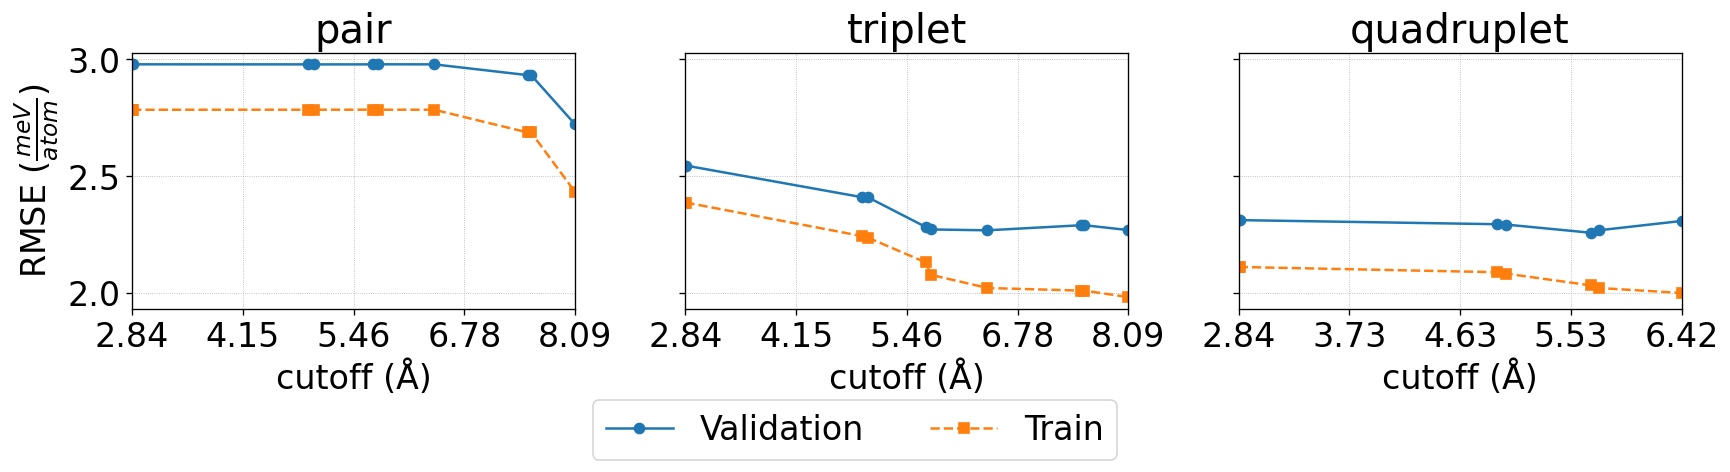

In [75]:
#plot diffrent cutoffs_kinds together
cutoffs_to_plot = cutoff_kinds  # use existing models list: ['2', '3', '4']
cutoff_order = np.sort(all_data['cutoff'].unique())

#change Font size
plt.rcParams.update({'font.size': 20})

# Create a figure with #models subplots
ncols = len(cutoffs_to_plot)
fig, axes = plt.subplots(1, ncols, figsize=(5 * ncols, 4), sharey=True, sharex=False, dpi=120)


if ncols == 1:
    axes = [axes]

for ax, cutoff_kind in zip(axes, cutoffs_to_plot):
    dfm = all_data[all_data['cutoff_kind'] == cutoff_kind].copy()
    dfm = dfm.sort_values('cutoff')

    # Plot validation and train
    ax.plot(dfm['cutoff'], dfm['validation'], marker='o', color='C0', linestyle='-', label='Validation')
    ax.plot(dfm['cutoff'], dfm['train'], marker='s', color='C1', linestyle='--', label='Train')
    # change tile based on cutoff number to real cutoff kind name
    name = cutoff_kind
    if cutoff_kind == '2':
        name = 'pair'
    elif cutoff_kind == '3':
        name = 'triplet'
    elif cutoff_kind == '4':
        name = 'quadruplet'
    ax.set_title(name)
    ax.set_xlabel('cutoff (Å)')
    ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5)
    
    # Create evenly spaced ticks between the actual data range
    x_min, x_max = dfm['cutoff'].min(), dfm['cutoff'].max()
    ax.set_xticks(np.linspace(x_min, x_max, 5))
    ax.set_xticklabels([f'{tick:.2f}' for tick in np.linspace(x_min, x_max, 5)])
    ax.set_xlim(x_min, x_max)

# y-label on the left-most axis
axes[0].set_ylabel(r'RMSE ($\frac{meV}{atom}$)')

# single legend for whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside upper center', bbox_to_anchor=(0.5, 0.1), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig(f'/nfshome/winkelmann/ARL/save/cutoff_kind_{algorithm}.png', bbox_inches='tight', dpi=300)
plt.show()

### plotting different models together

In [ ]:
# for plotting different models together
def read_data(model_name, cutoff_kind, algorithm):    
    #for files with all cutoffs
    file = open(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoffs_{cutoff_kind}_{model_name}_fitting_data', 'r')  #edit for plotting over right cutoff
    file.readline()
    lines = file.readlines()
    file.close()
    data = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

    for line in lines:
        line = line.replace(' ', '').replace('\t','').replace('\n','')
        line = line.split(',')
        if line[0] != algorithm:
            continue
        if len(line) > 12:
            print(line[12] + ',' + str(line[0:12]))
            continue
        if len(line) > 8:
            data['cutoff'].append(float(line[4]))
            data['validation'].append(float(line[5]))
            data['train'].append(float(line[6]))
            data['BIC'].append(float(line[7]))
            data['number'].append(float(line[8]))
            data['nonzero'].append(float(line[9]))
            continue
        data['cutoff'].append(float(line[1]))
        data['validation'].append(float(line[2]))
        data['train'].append(float(line[3]))
        data['BIC'].append(float(line[4]))
        data['number'].append(float(line[5]))
        data['nonzero'].append(float(line[6]))
    return data

models = ['noTS', 'explicitTS', 'anchorTS']
cutoff_kind = '2'
algorithm = 'ardr-lineScan'
all_data = pd.DataFrame()
for cutoff_kind in cutoff_kinds:
    df = pd.DataFrame(read_data(model_name, cutoff_kind, algorithm))
    df['model'] = cutoff_kind
    all_data = pd.concat([all_data, df])

# Convert units tom meV/atom
conv = 1000
all_data['validation'] = all_data['validation'] * conv
all_data['train'] = all_data['train'] * conv
print(all_data)
    

FileNotFoundError: [Errno 2] No such file or directory: '/nfshome/winkelmann/ARL/save/noTS_data/cutoffs_noTS_noTS_fitting_data'

In [71]:
#plot diffrent models
models_to_plot = models  # use existing models list: ['noTS', 'explicitTS', 'anchorTS']
cutoff_order = np.sort(all_data['cutoff'].unique())

#change Font size
plt.rcParams.update({'font.size': 20})

# Create a figure with #models subplots
ncols = len(models_to_plot)
fig, axes = plt.subplots(1, ncols, figsize=(5 * ncols, 4), sharey=True, sharex=False, dpi=120)


if ncols == 1:
    axes = [axes]

for ax, model_name in zip(axes, models_to_plot):
    dfm = all_data[all_data['model'] == model_name].copy()
    dfm = dfm.sort_values('cutoff')

    # Plot validation and train
    ax.plot(dfm['cutoff'], dfm['validation'], marker='o', color='C0', linestyle='-', label='Validation')
    ax.plot(dfm['cutoff'], dfm['train'], marker='s', color='C1', linestyle='--', label='Train')
    ax.set_title(model_name)
    ax.set_xlabel('cutoff (Å)')
    ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5)
    
    # Set specific x-axis limits based on the model
    if model_name == 'noTS':  # First subplot
        min_val = min(dfm['cutoff'])
        ax.set_xlim([min_val, 14.15])  # Set max to 14.15 for left plot
    else:  # Middle and right subplots
        min_val = min(dfm['cutoff'])
        ax.set_xlim([min_val, 8.09])   # Set max to 8.09 for other plots
    
    # Create evenly spaced ticks between the actual data range
    x_min, x_max = dfm['cutoff'].min(), dfm['cutoff'].max()
    ax.set_xticks(np.linspace(x_min, x_max, 5))
    ax.set_xticklabels([f'{tick:.2f}' for tick in np.linspace(x_min, x_max, 5)])

# y-label on the left-most axis
axes[0].set_ylabel(r'RMSE ($\frac{meV}{atom}$)')

# single legend for whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside upper center', bbox_to_anchor=(0.5, 0.1), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig(f'/nfshome/winkelmann/ARL/save/cutoff_comparison_{algorithm}.png', bbox_inches='tight', dpi=300)
plt.show()

NameError: name 'models' is not defined

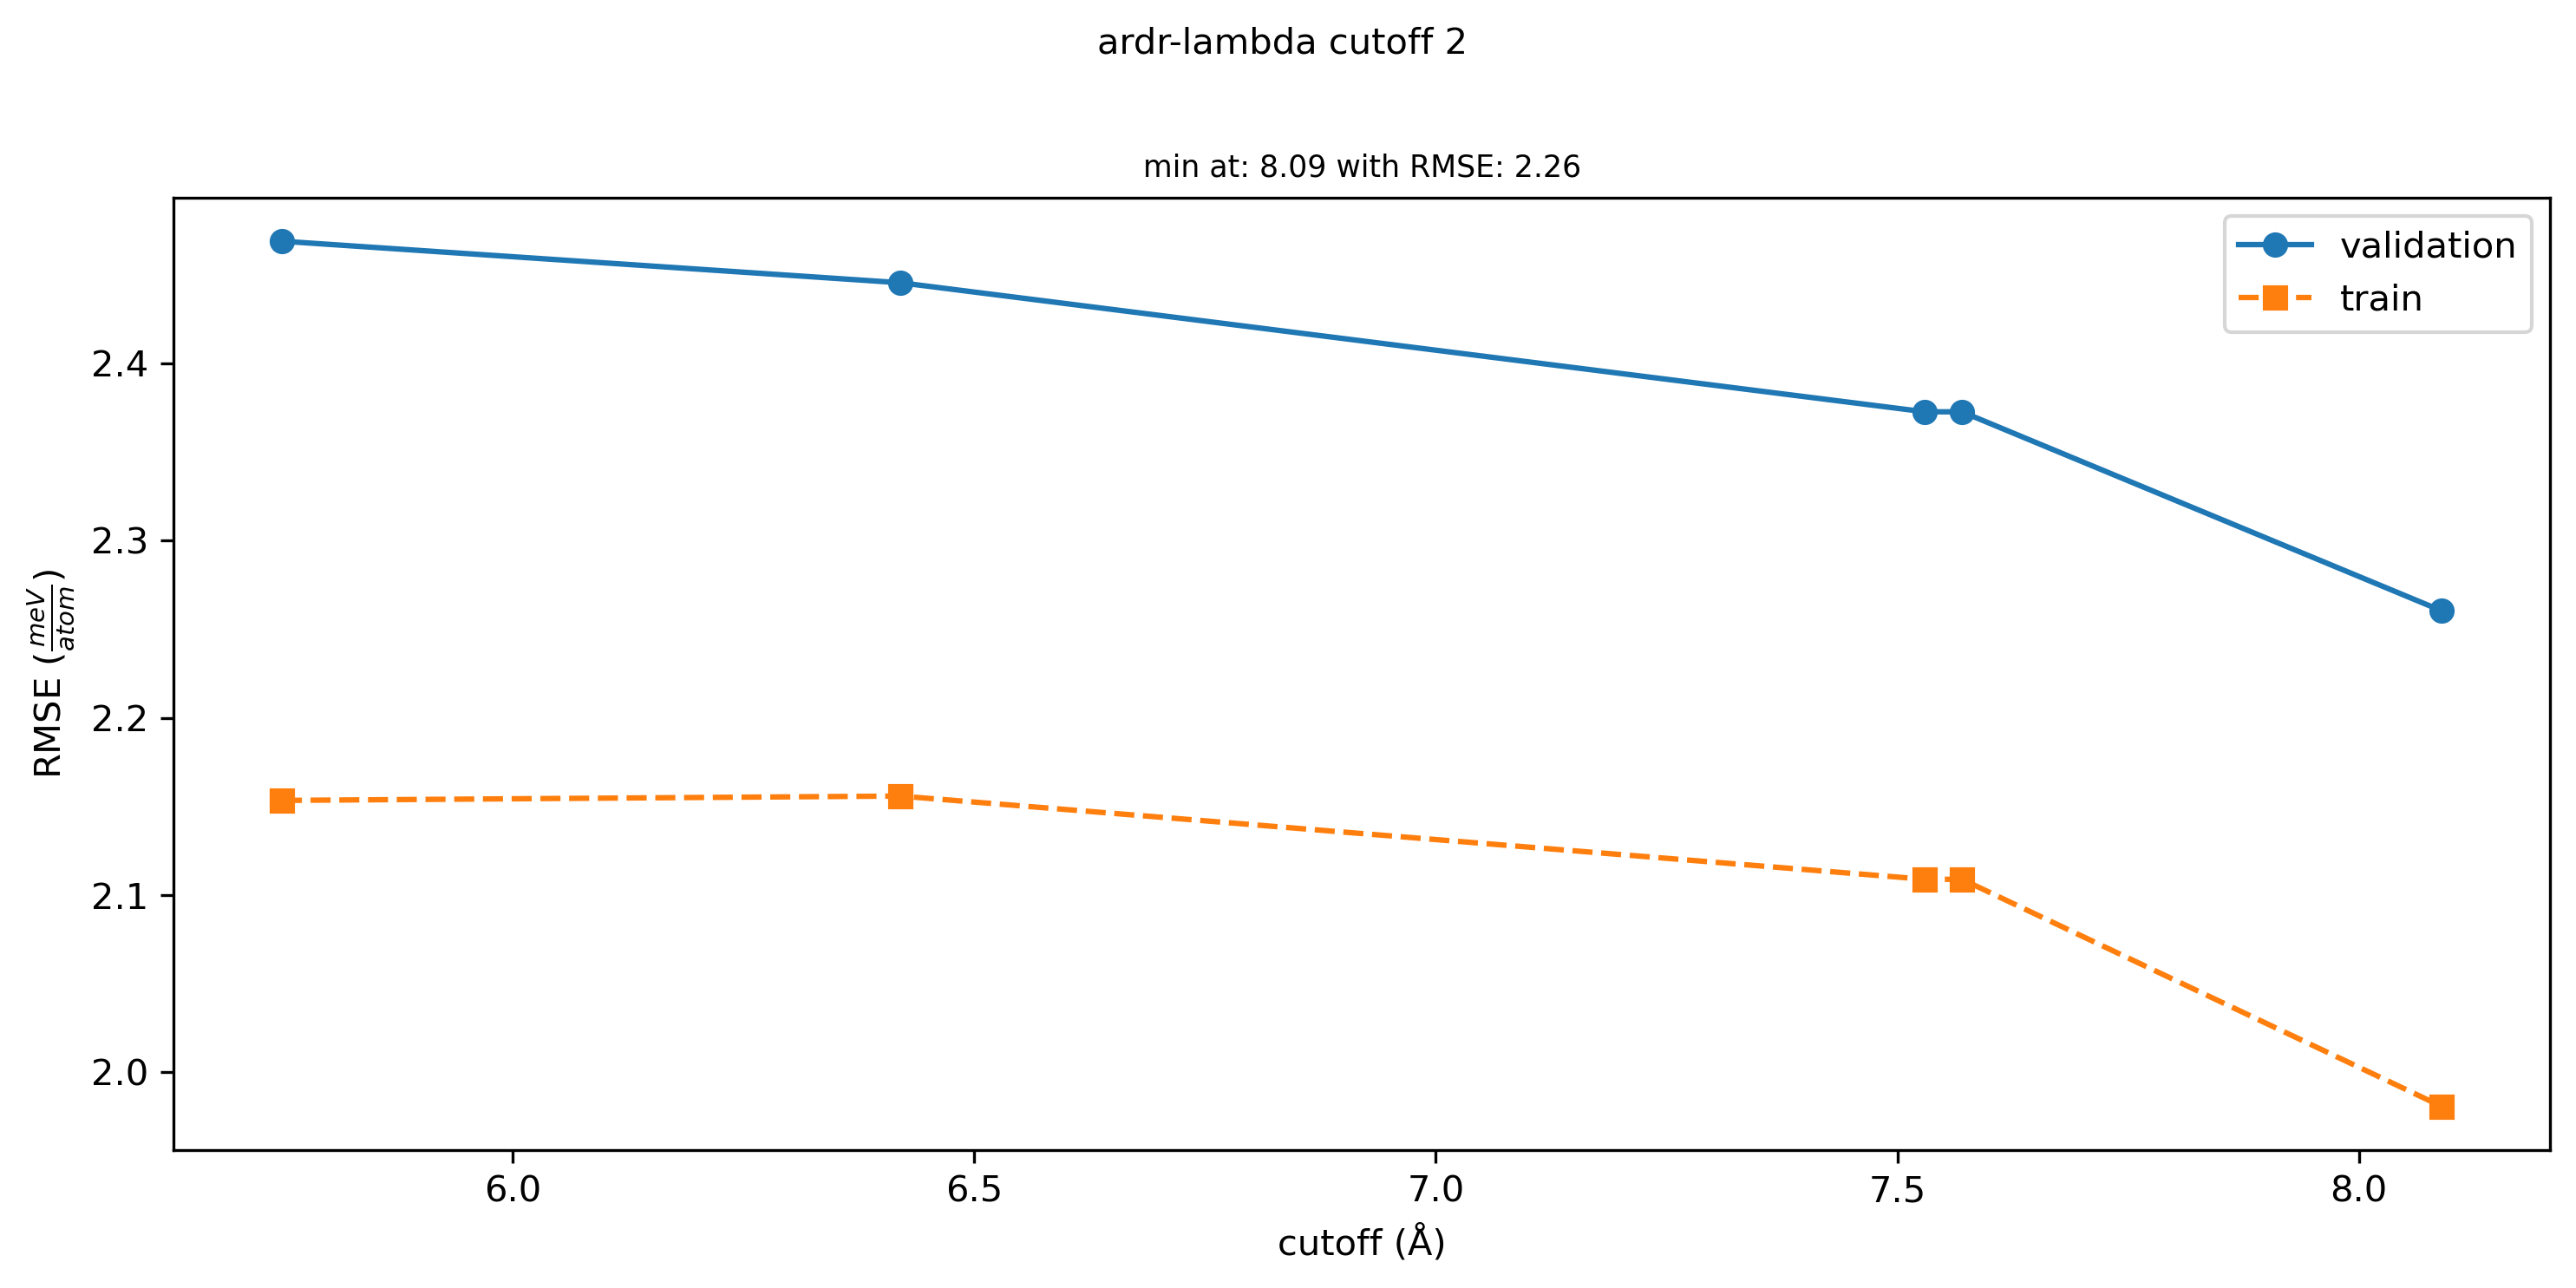

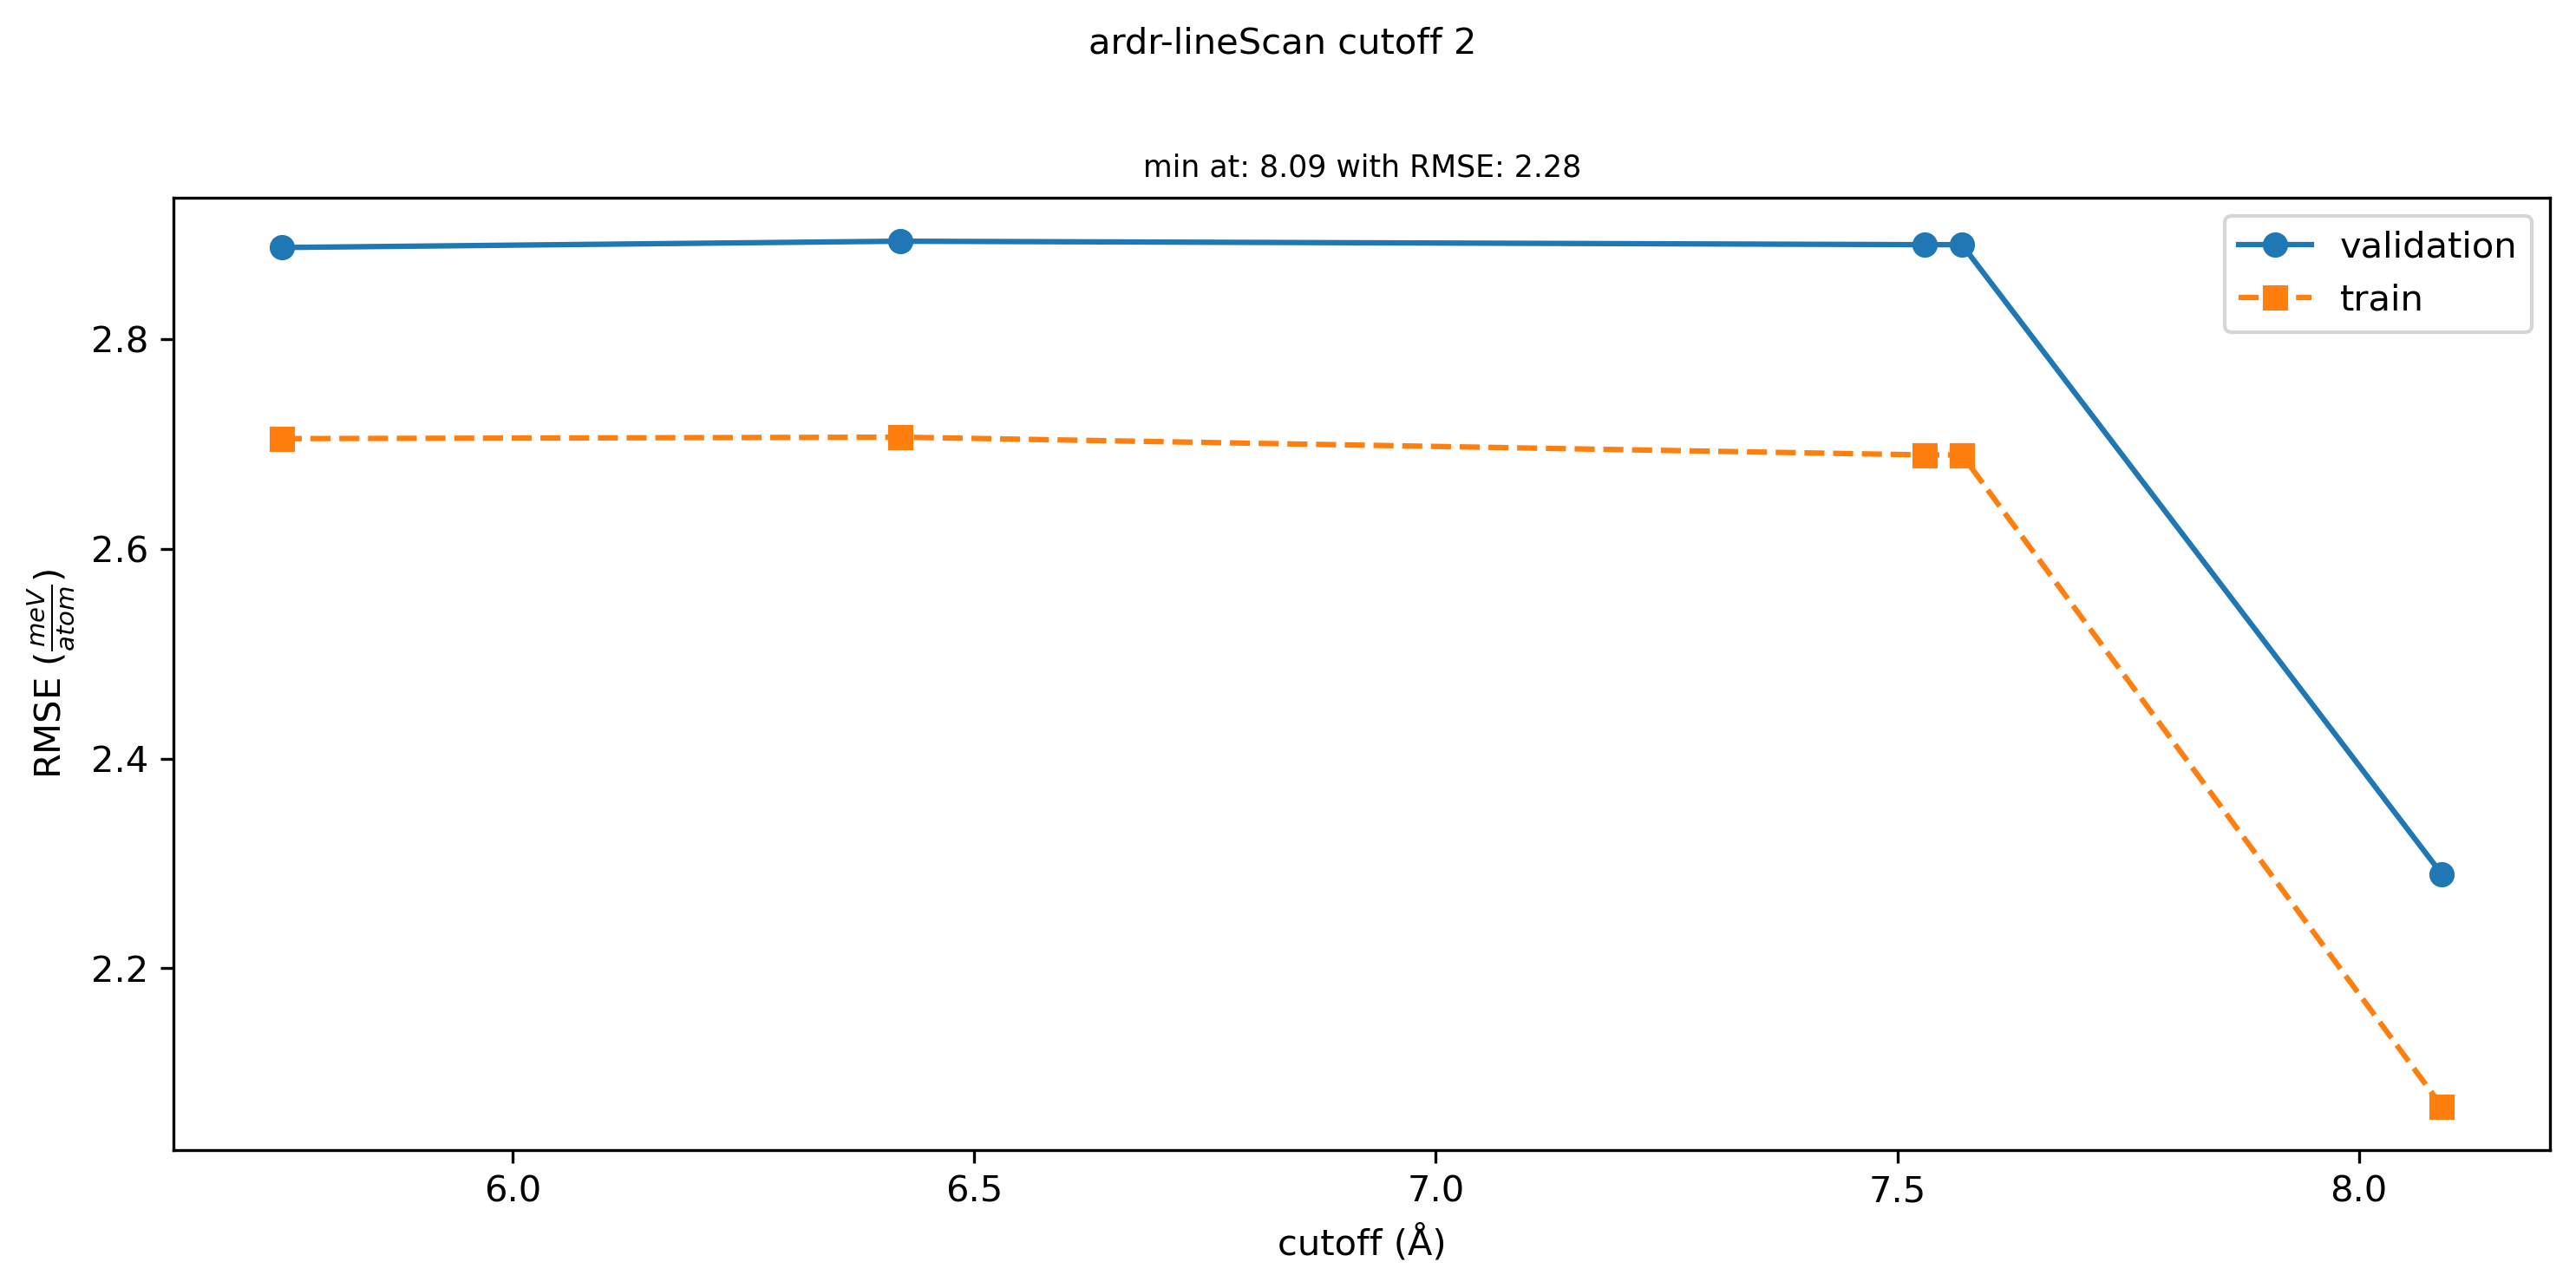

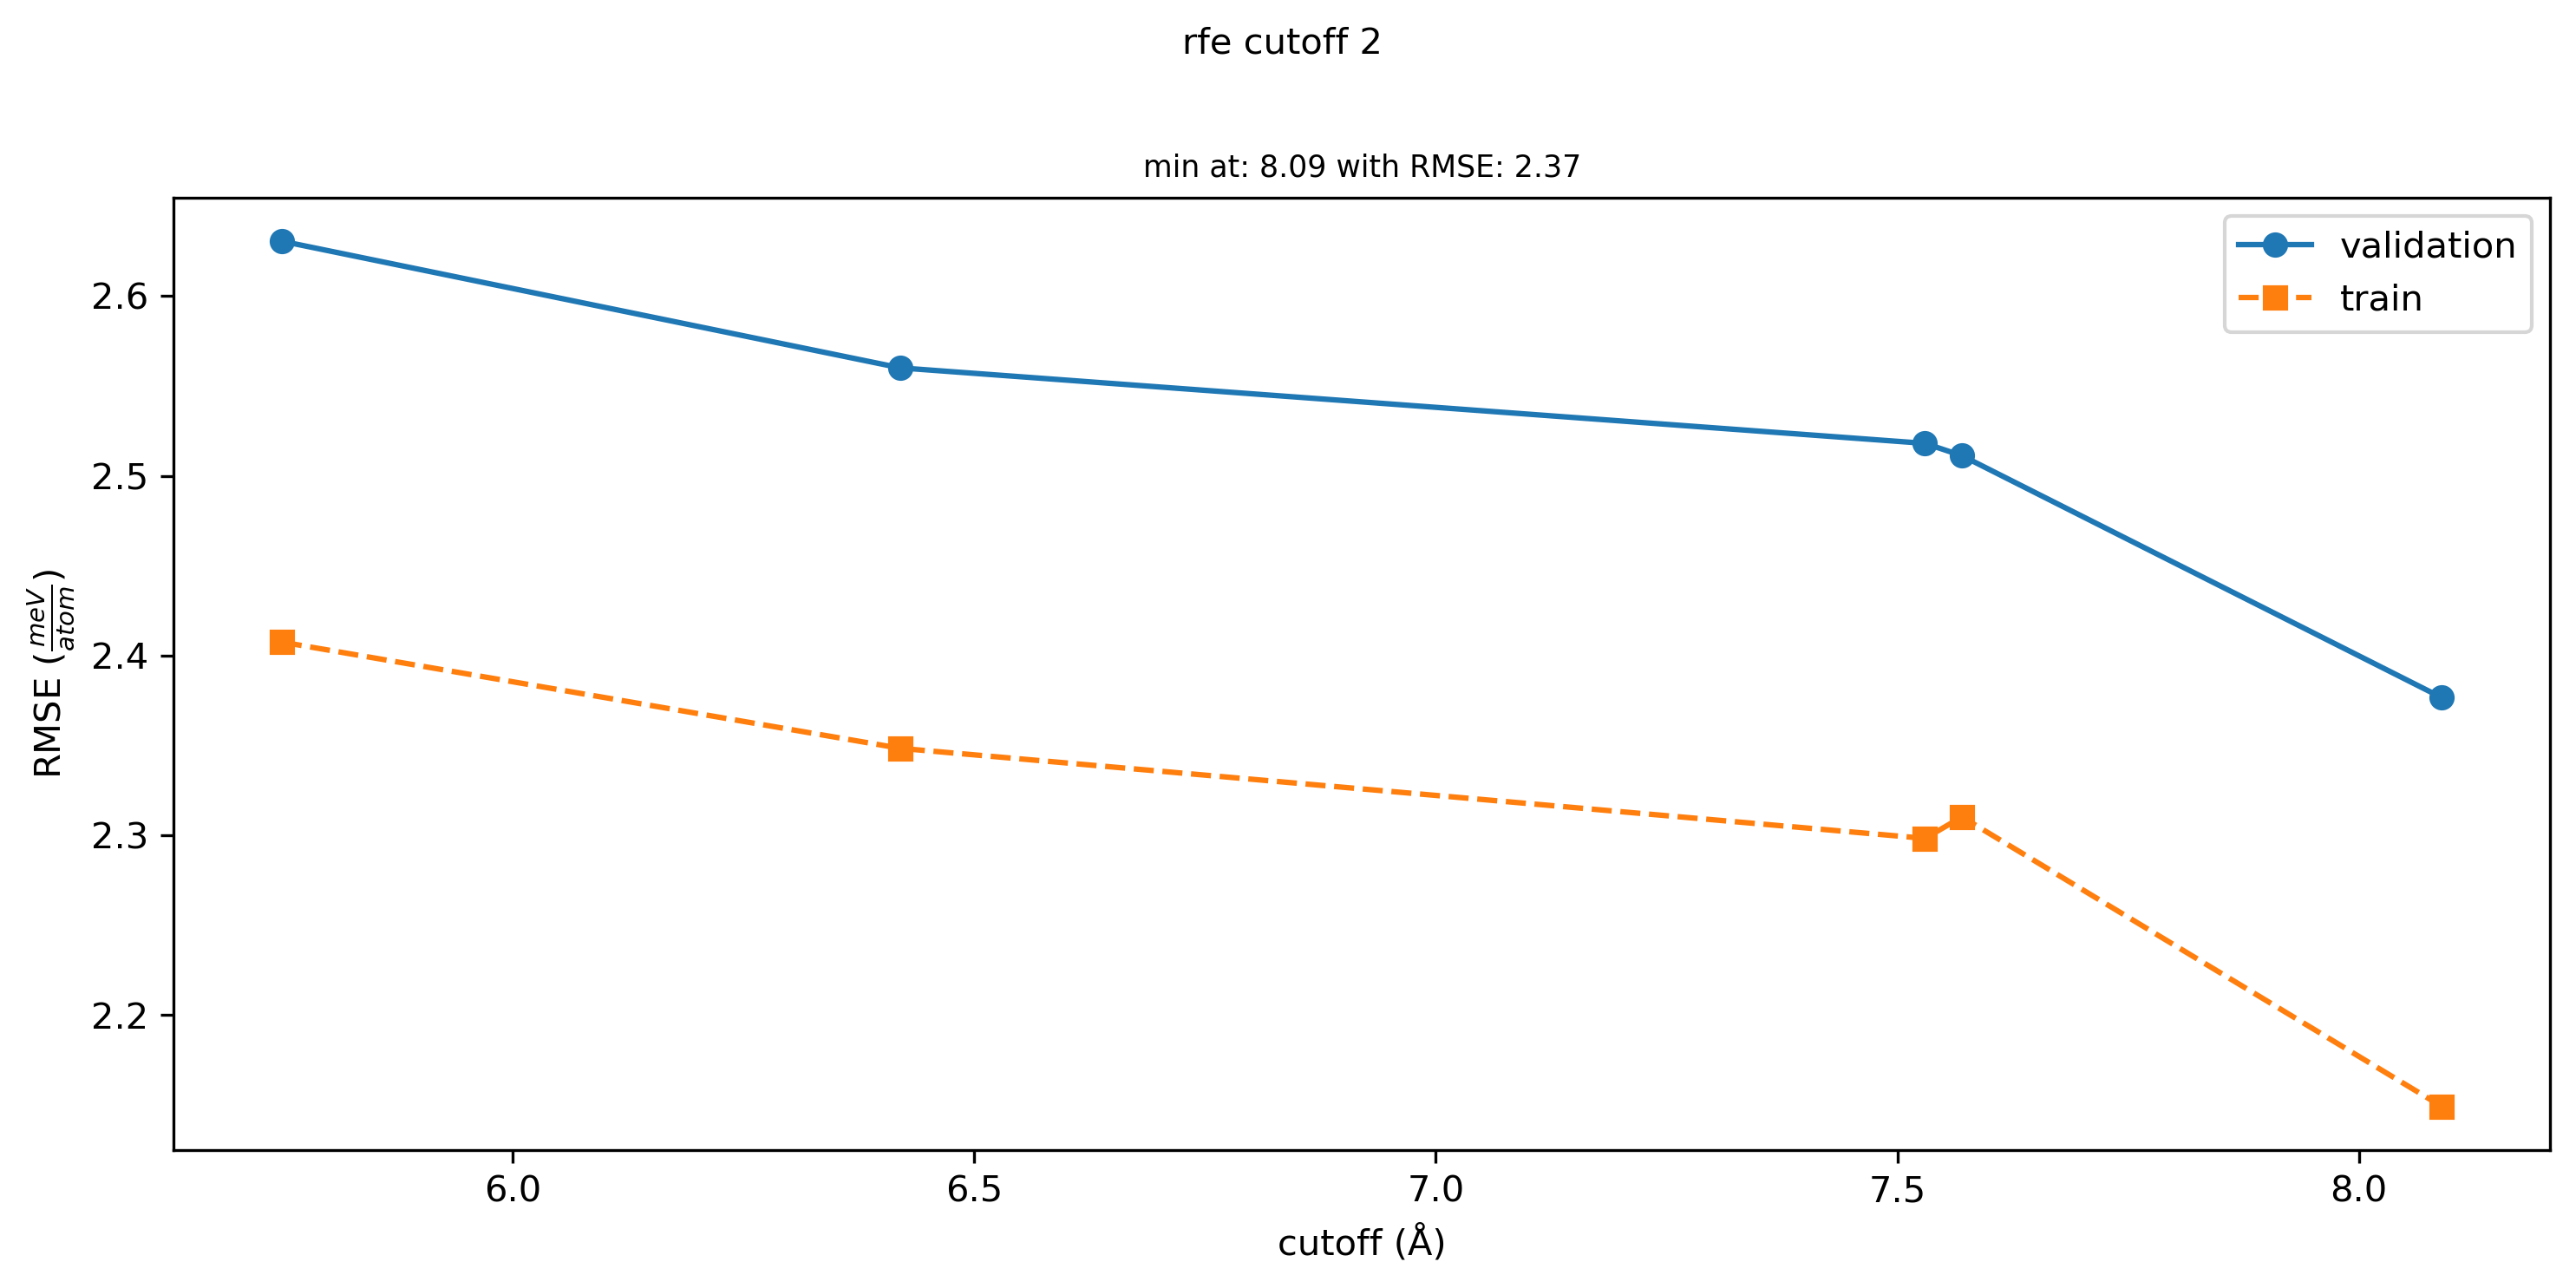

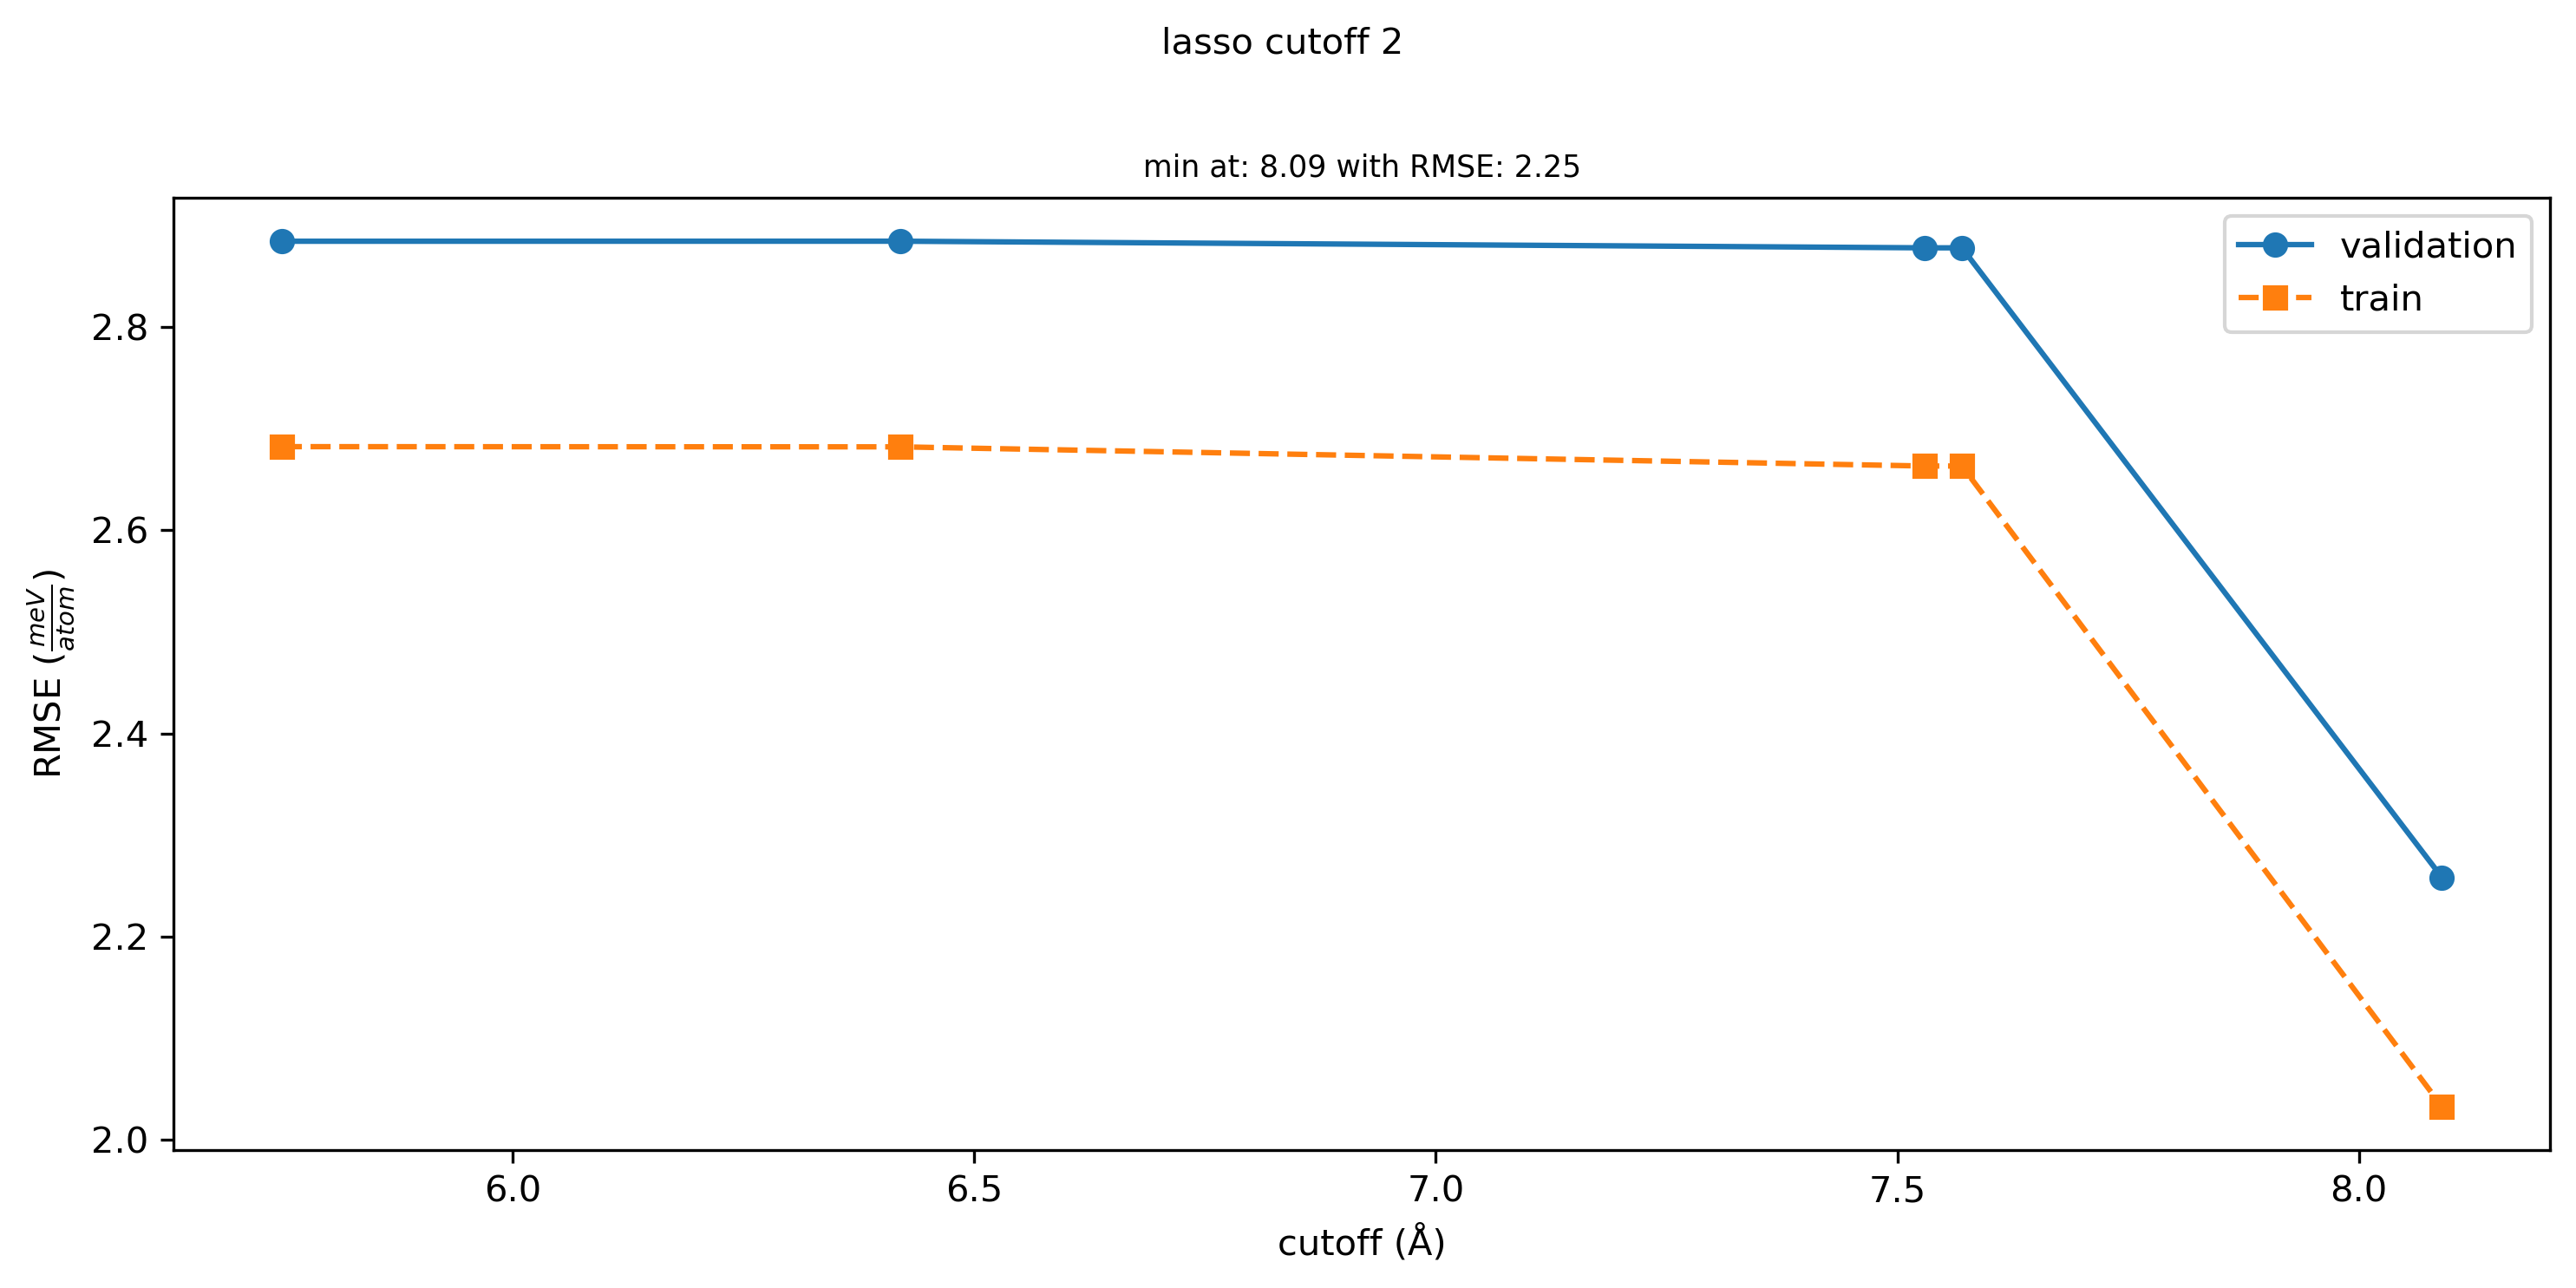

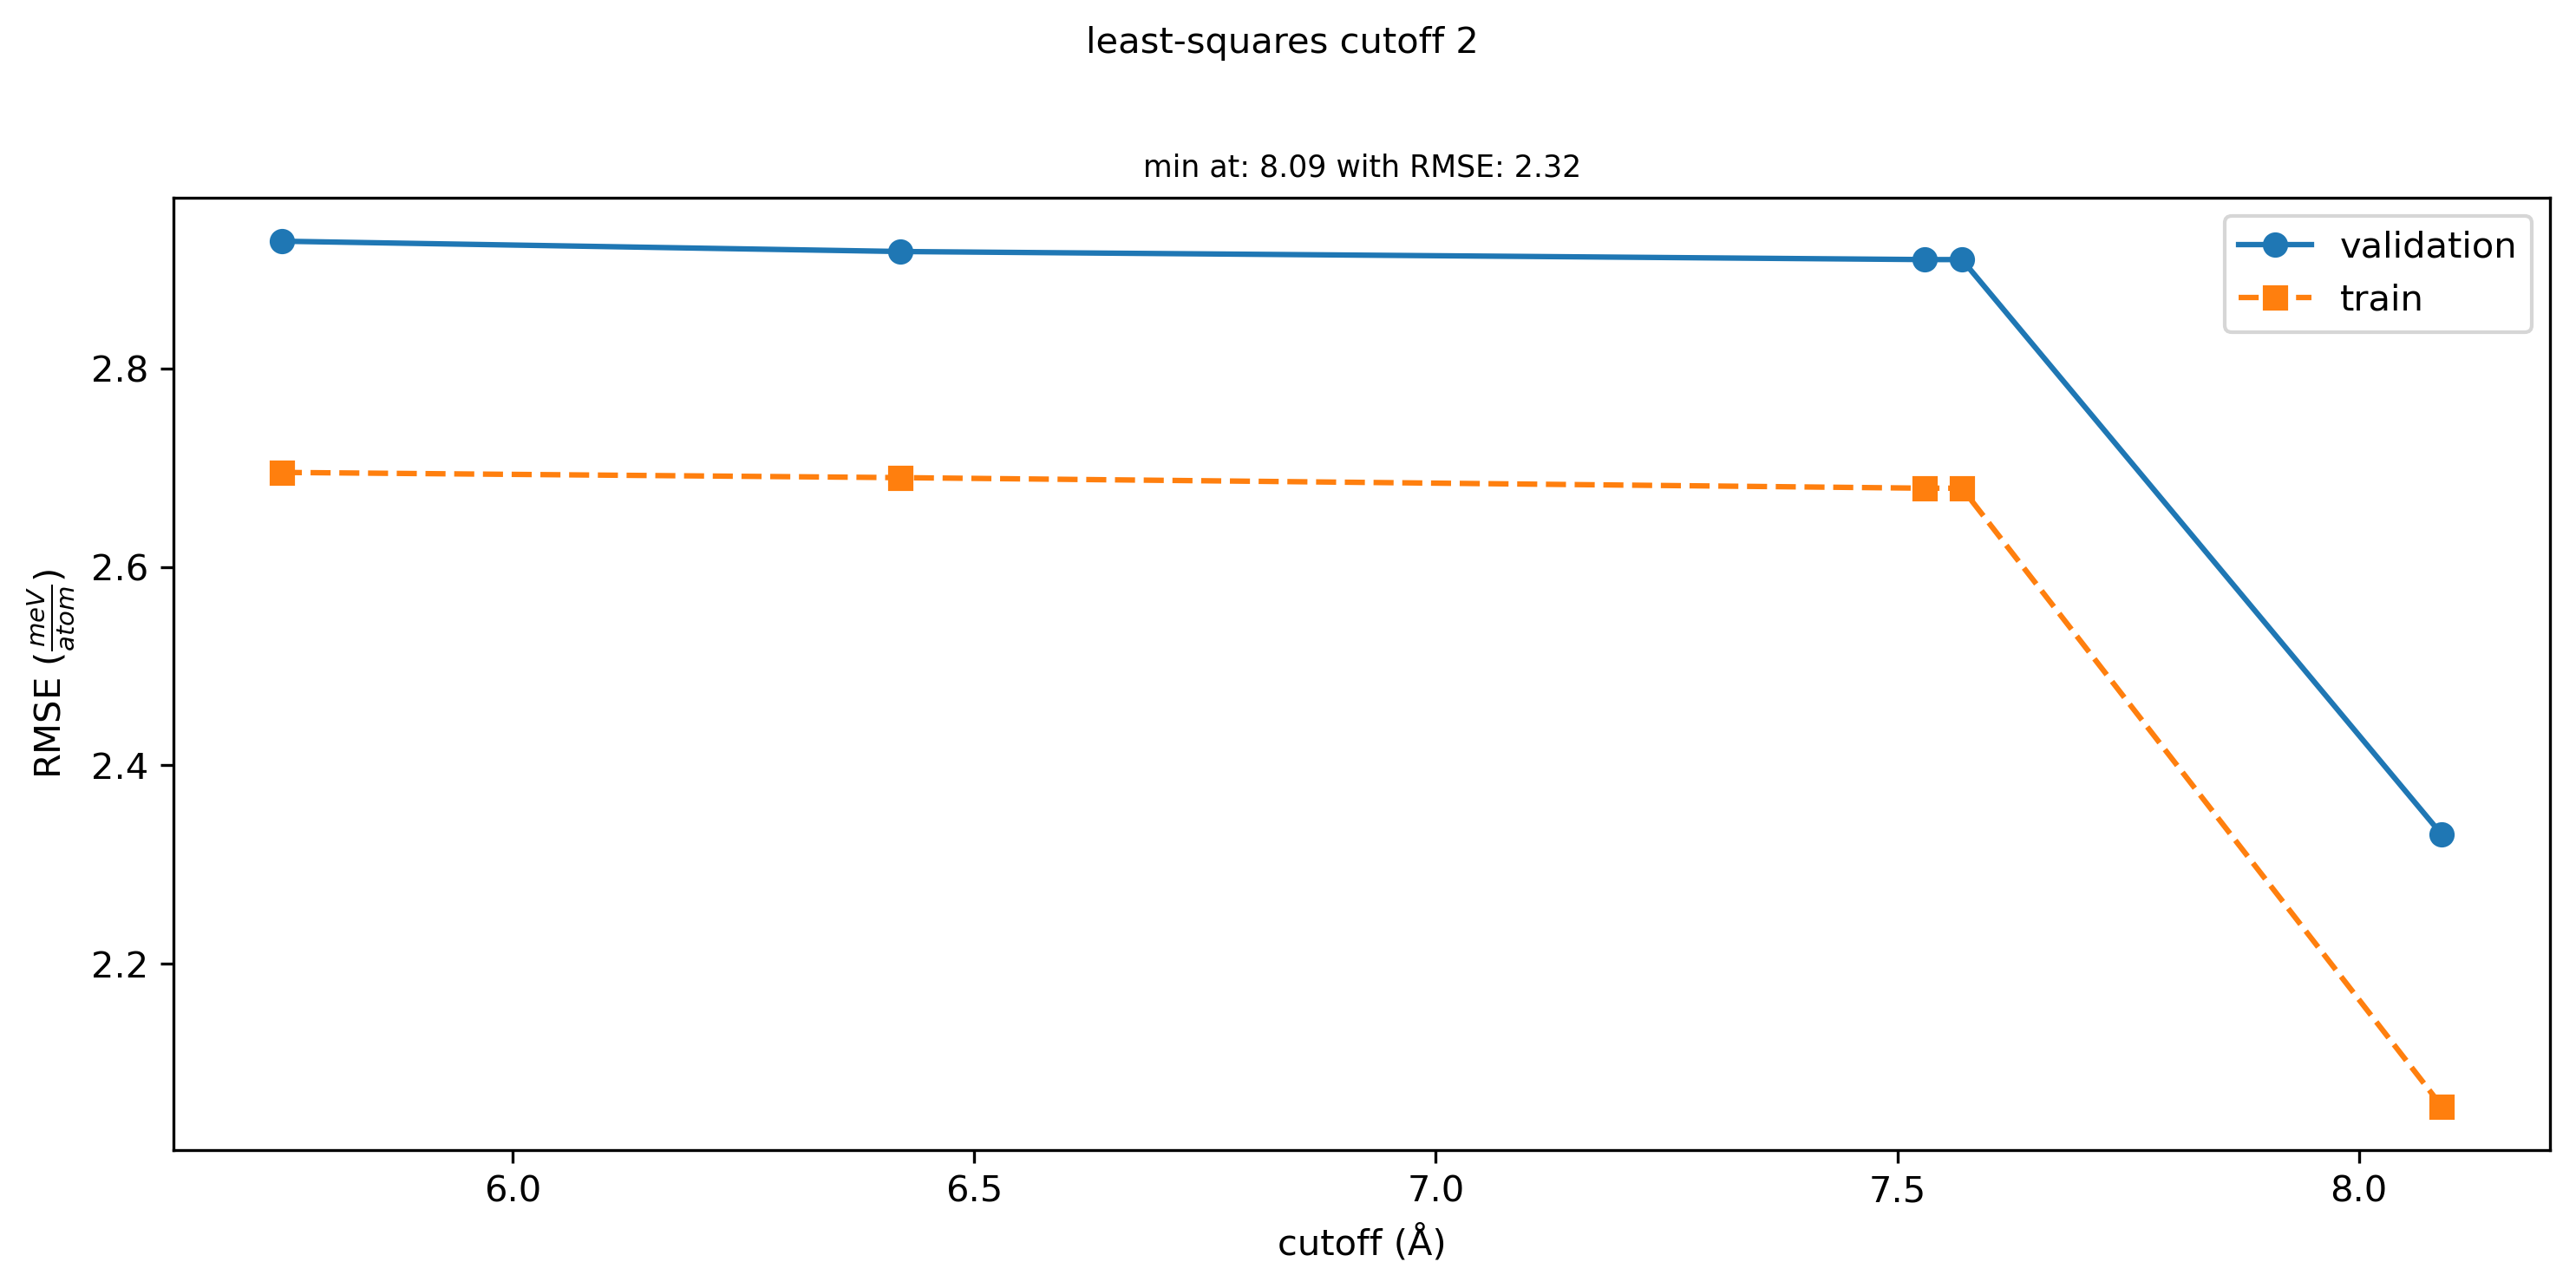

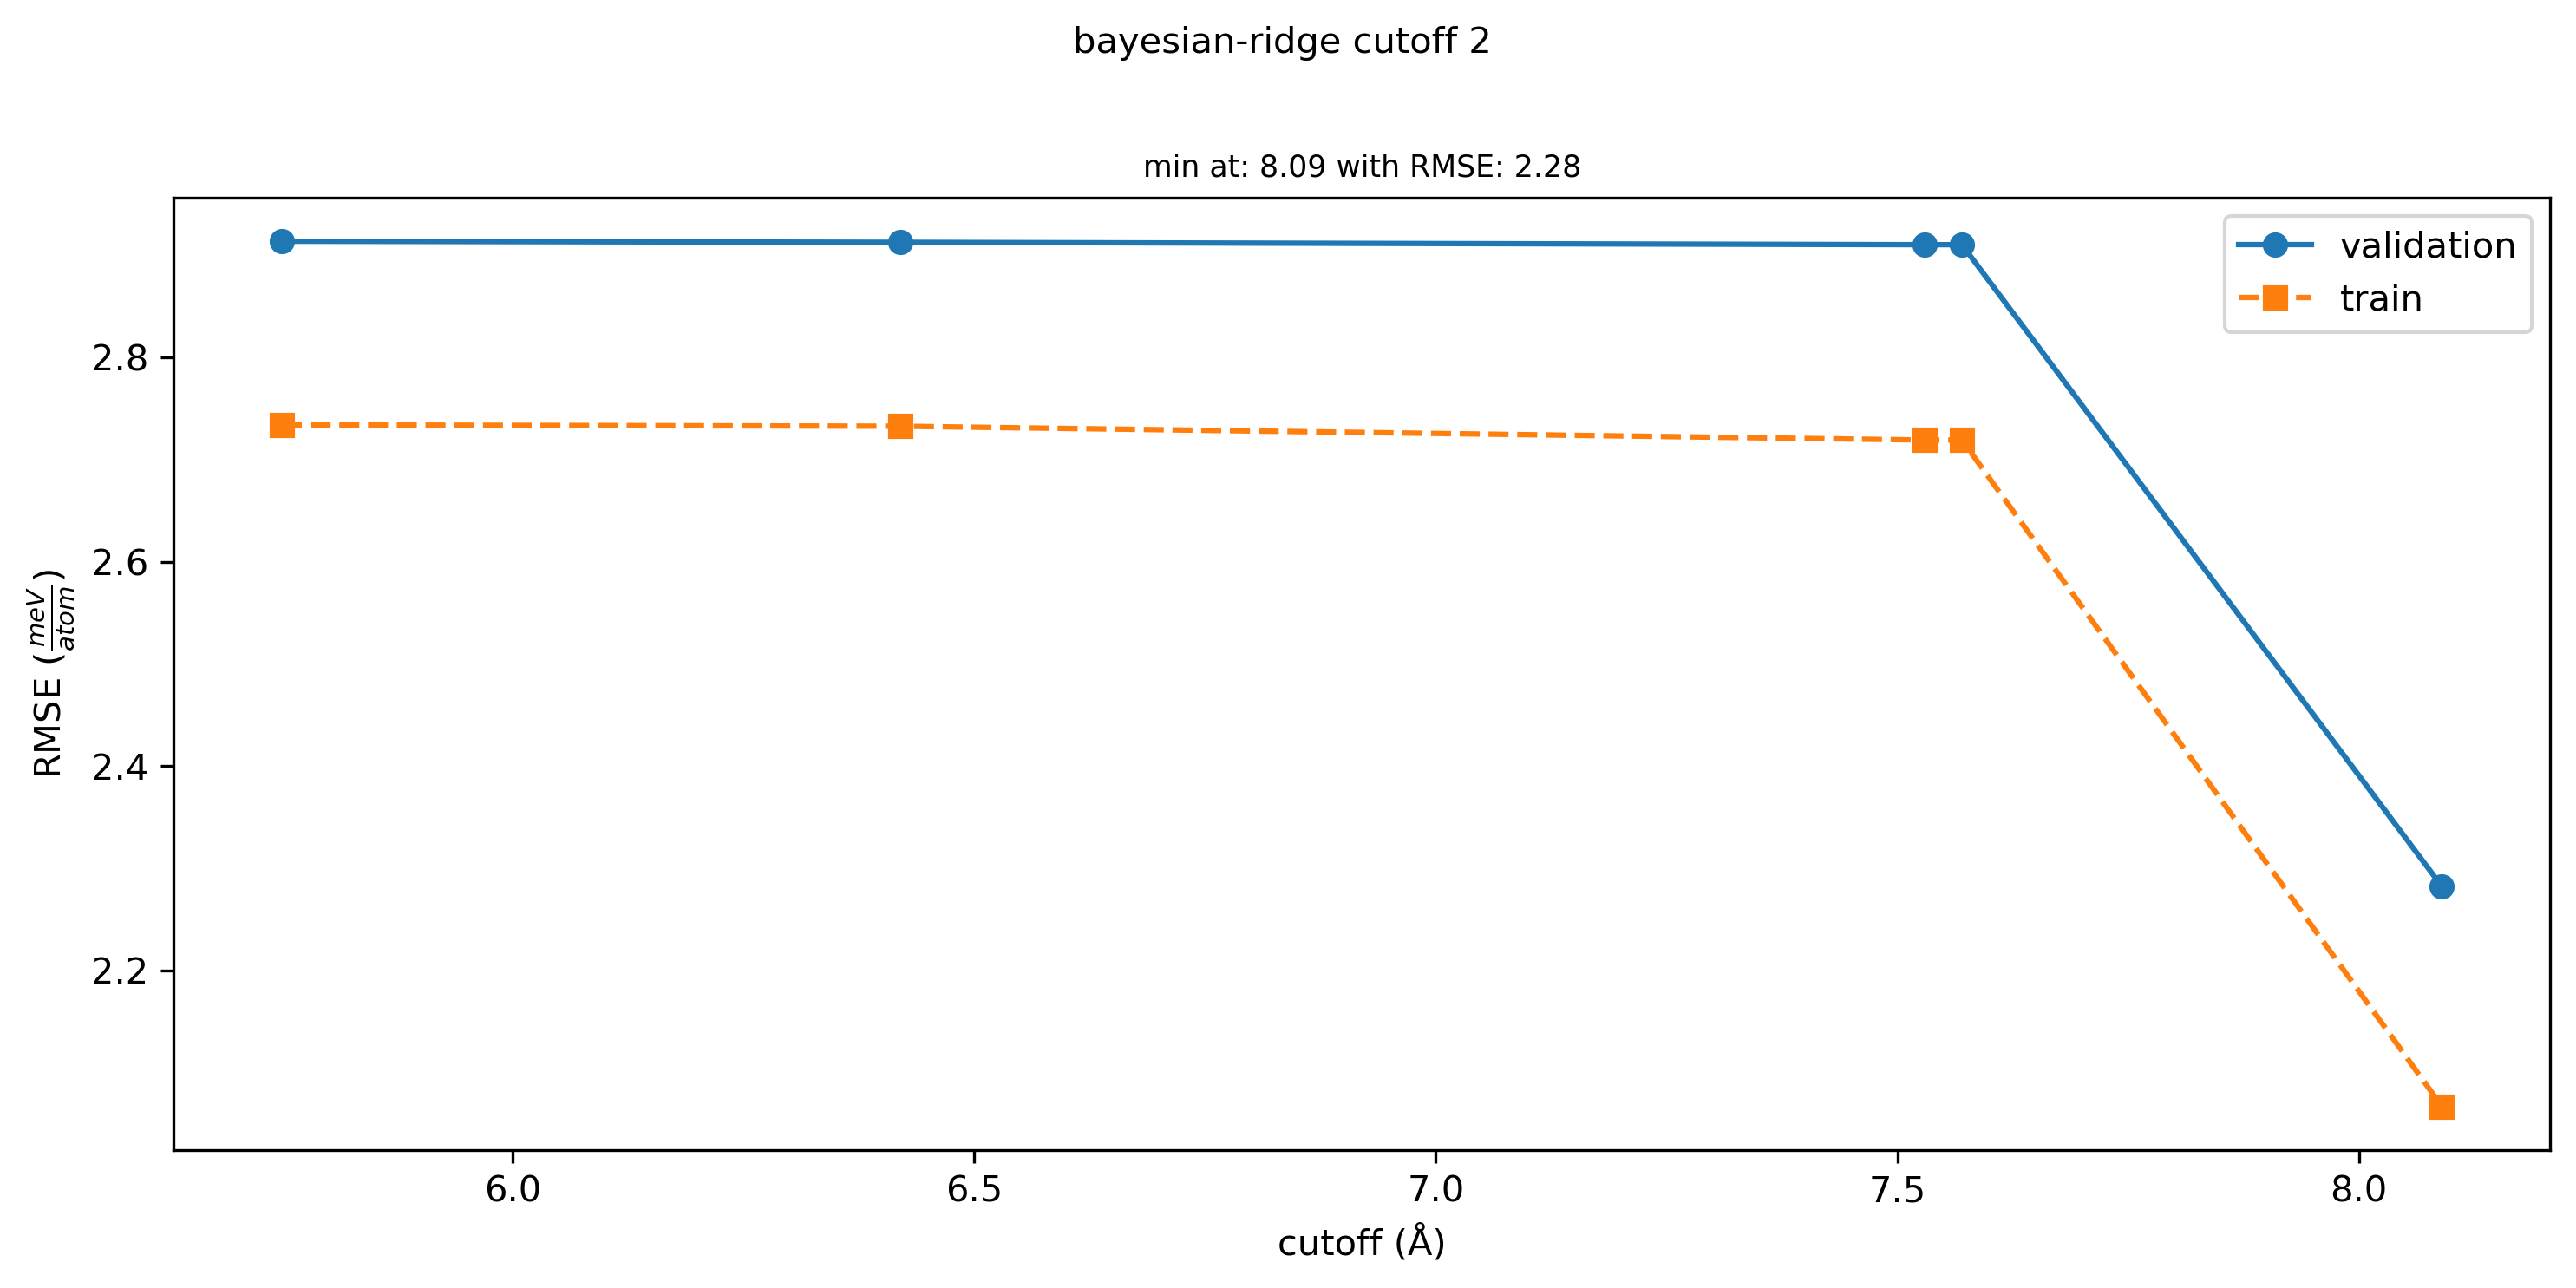

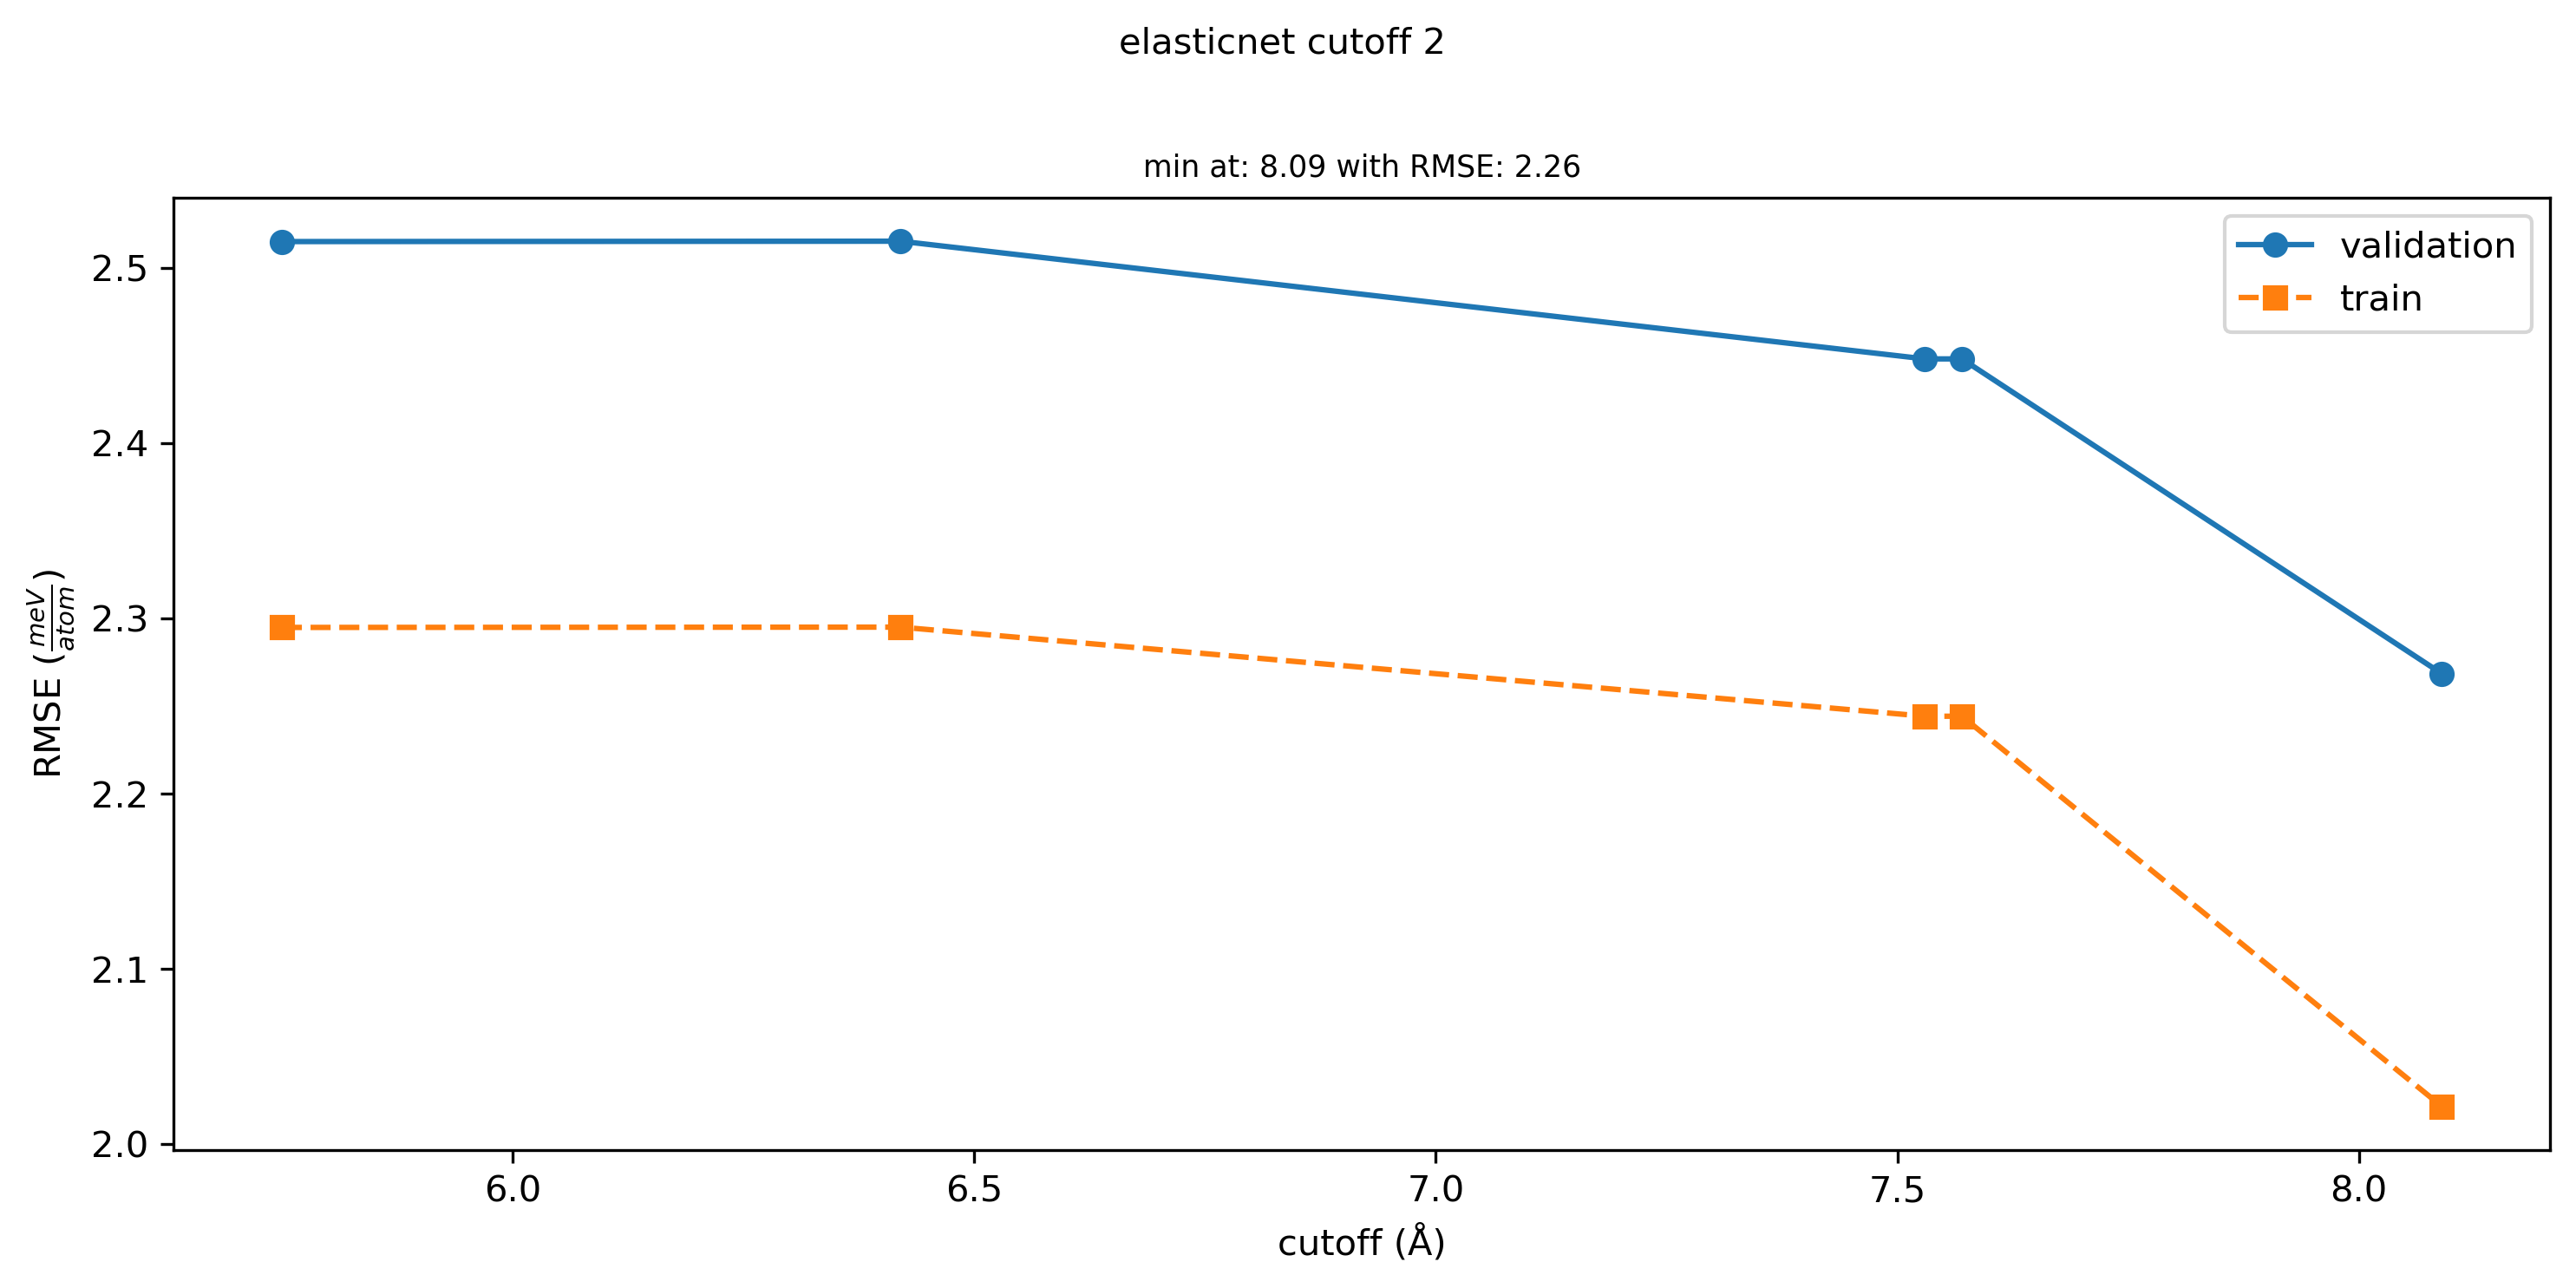

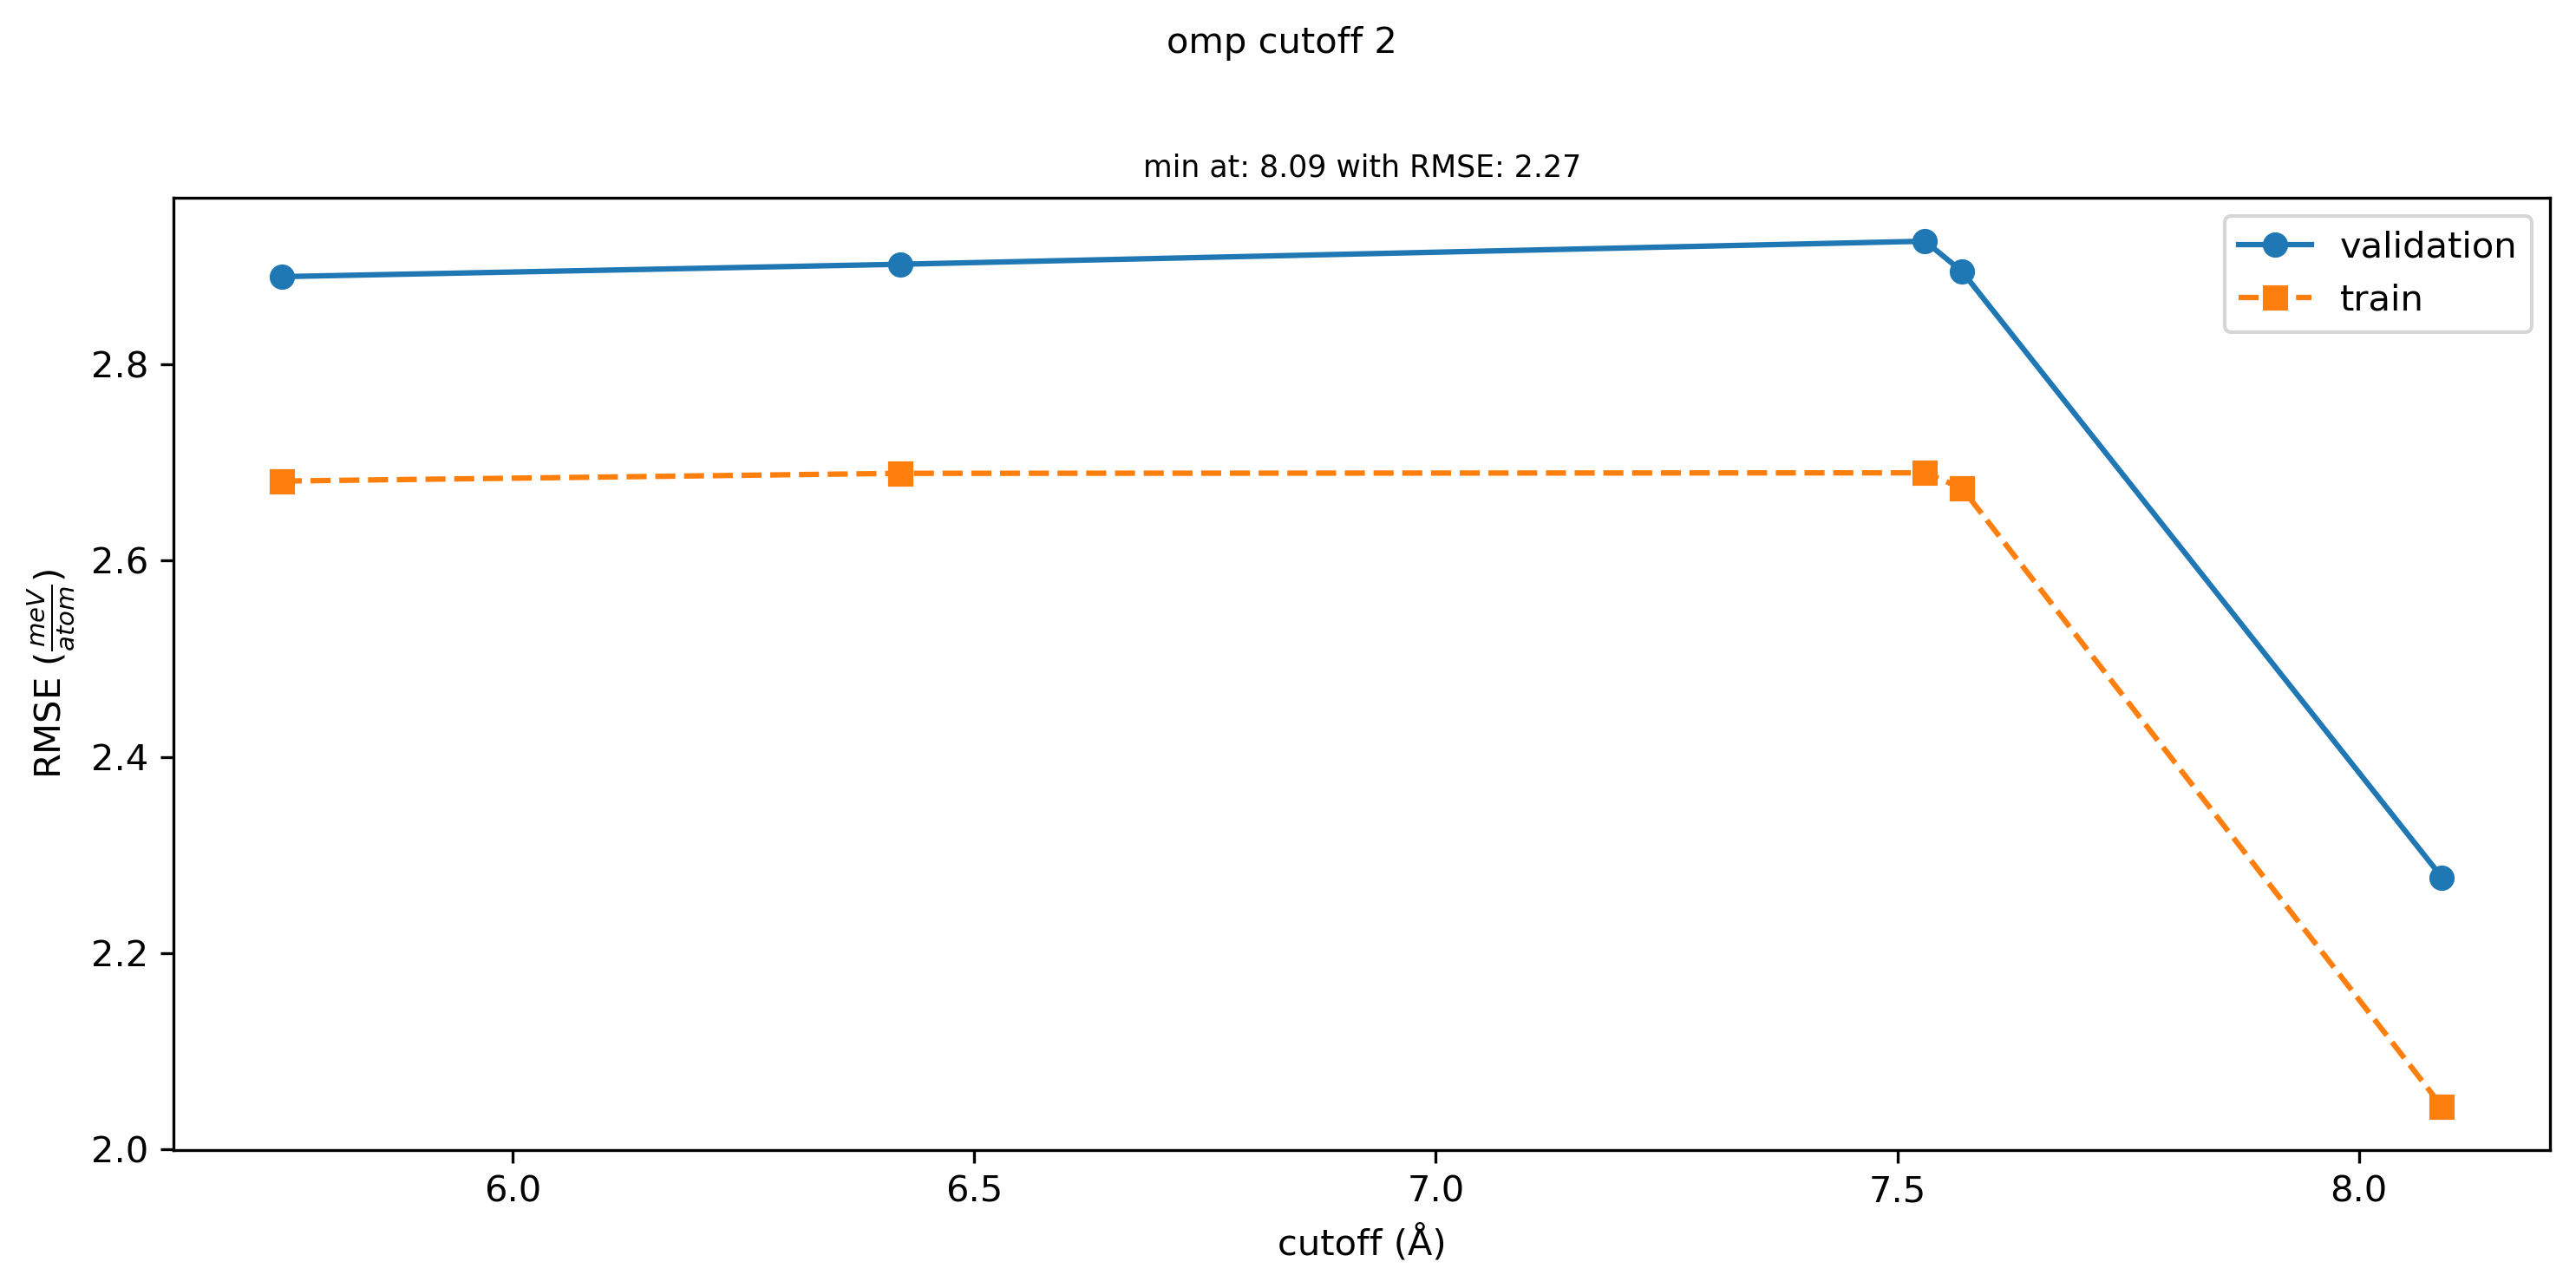

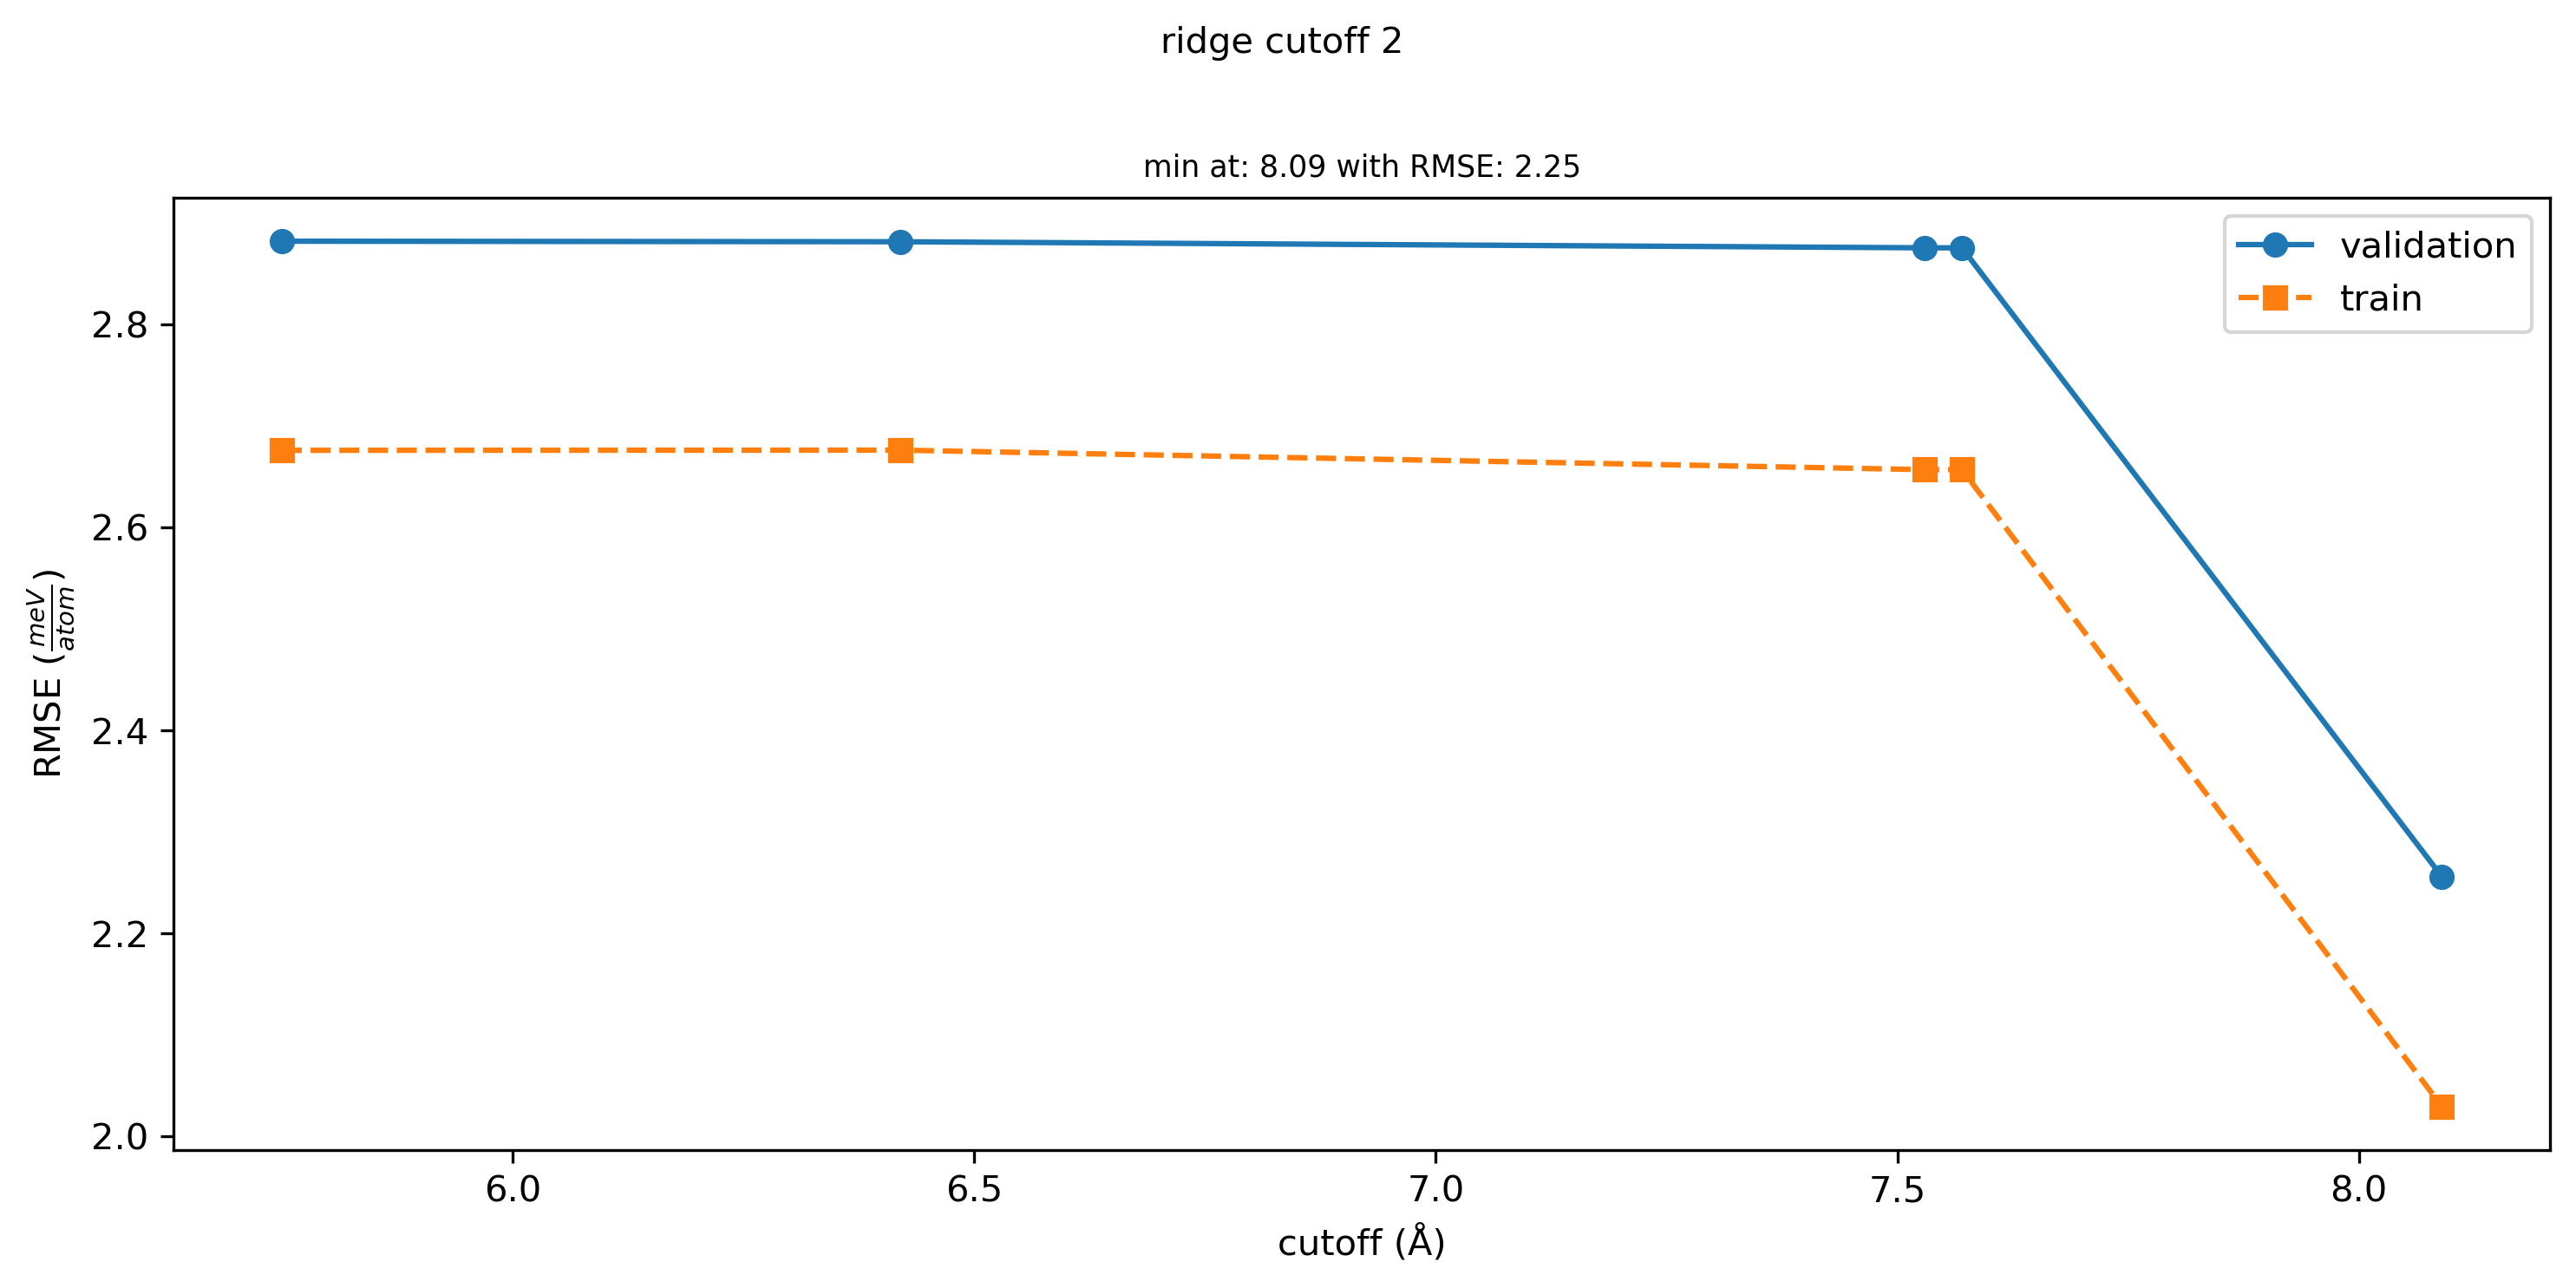

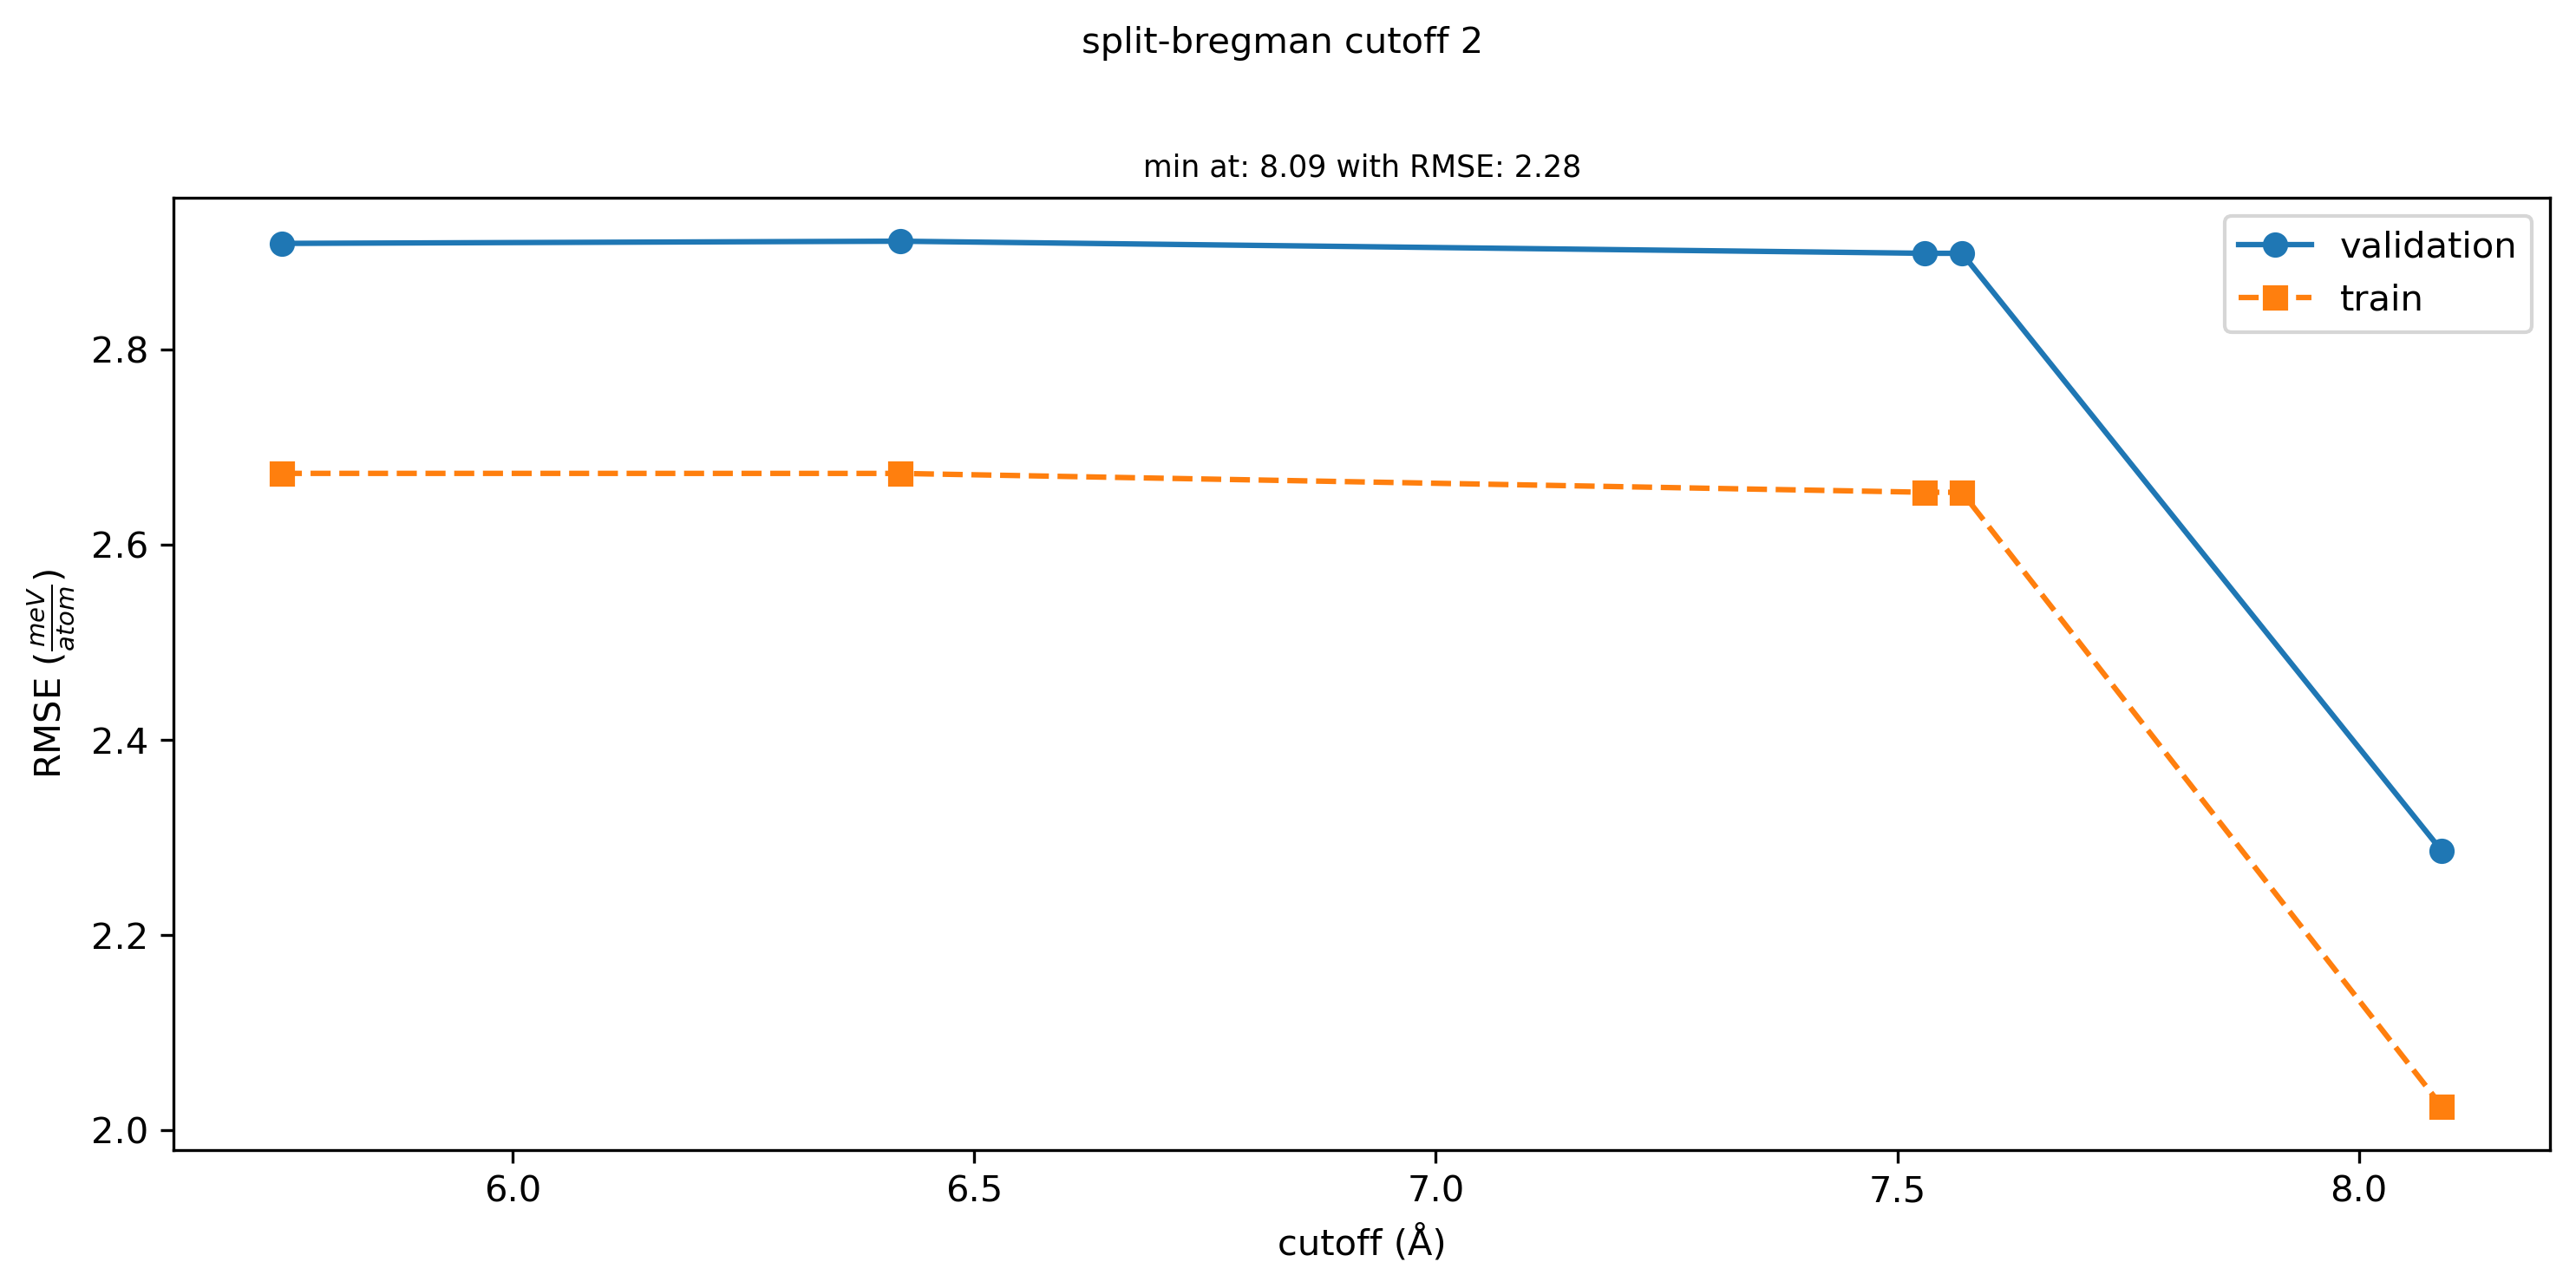

In [ ]:
conv = 1000

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(10, 5), dpi=300, sharex=True, nrows=1)
    ax = axes

    fig.suptitle(f'{fit_method} cutoff {cutoff_kind} \n ', size='medium')
    ax.set_title(f'min at: {df.cutoff[df.validation.idxmin()]} with RMSE: {str(df.validation.min()*conv)[:4]}', size='small')

    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)

    fig.savefig(f'/nfshome/winkelmann/ARL/save/{cutoff_kind}TS_data/cutoff_{cutoff_kind}TS_png_plots/plot_cutoff_{cutoff_kind}_{fit_method}.png')


### plotting with extra lines

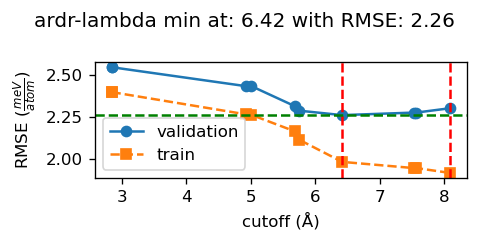

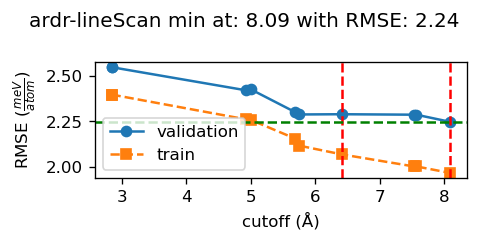

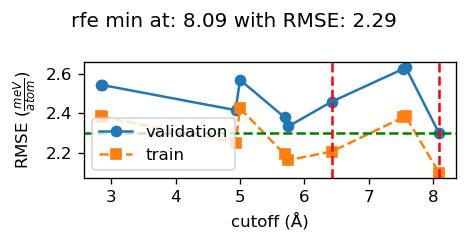

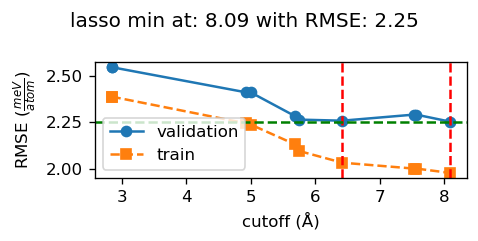

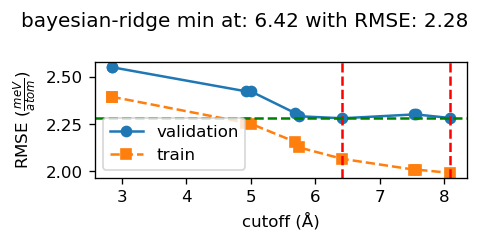

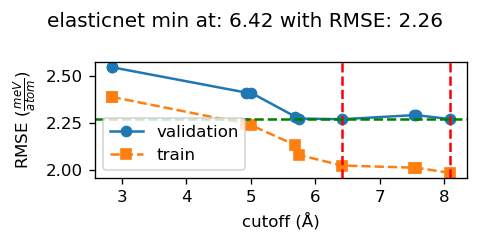

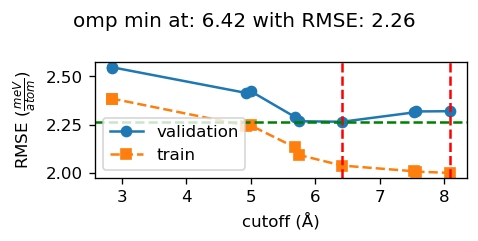

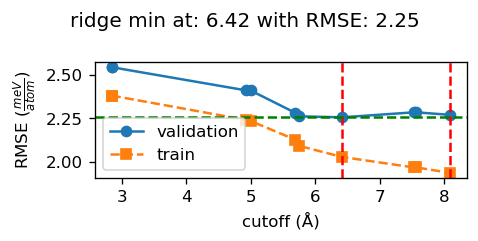

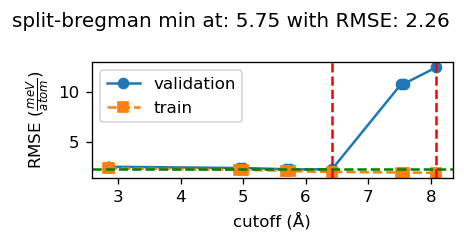

In [5]:
### with extra lines at specified values
conv = 1000

# justr the fit methods I want to fit
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
            'ridge', 'split-bregman']

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(4, 2), dpi=120, sharex=True, nrows=1)

    fig.suptitle('%s min at: %s with RMSE: %.4s' %(fit_method, df.cutoff[df.validation.idxmin()], df.validation.min()*conv))

    ax = axes
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    # extra lines
    ax.axvline(x=6.42, color='r', linestyle='--', label='c2')
    ax.axvline(x=8.09, color='r', linestyle='--', label='c2')
    ax.axhline(y=df.validation.min()*conv, color='g', linestyle='--')


    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)

    fig.savefig(
        '/nfshome/winkelmann/ARL/save/titanTS_data/cutoff_titanTS_png_plots/plot_cutoff_3_%s_extra-lines.png' % (fit_method))

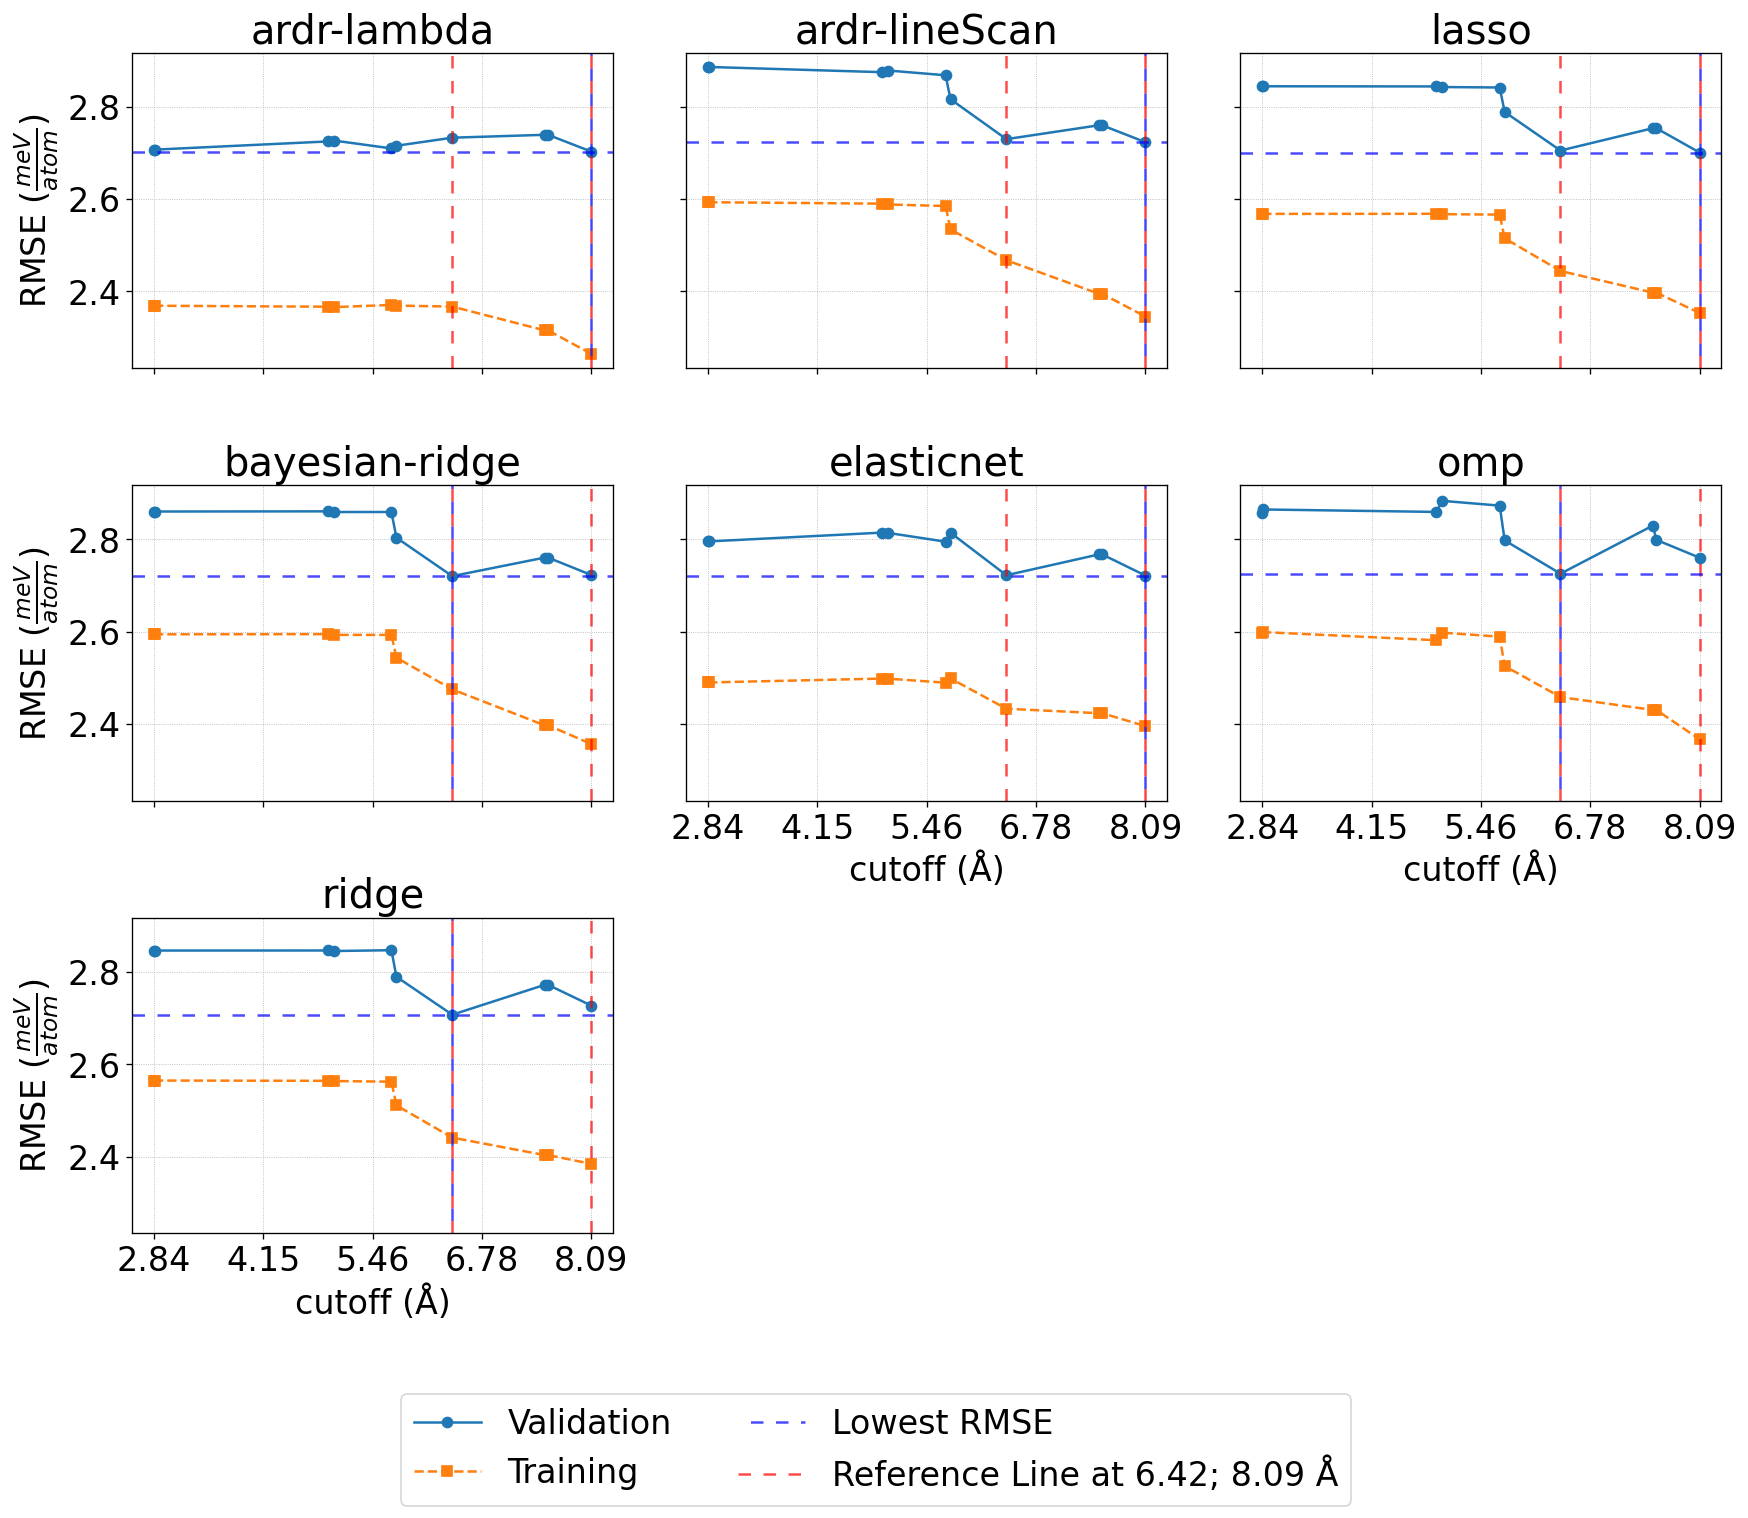

In [ ]:
# Create a single figure with shared axes for all fit methods and lines
conv = 1000

# justr the fit methods I want to fit
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge']
# not used for fit_method in fit_methods: ['rfe', 'least-squares', 'split-bregman']

# Calculate number of rows needed (maximum 3 plots per row)
num_methods = len(fit_methods)
num_cols = min(3, num_methods)
num_rows = (num_methods + num_cols - 1) // num_cols  # Ceiling division

#change Font size
plt.rcParams.update({'font.size': 20})

# Create a figure with subplots - organizing methods in rows of 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), dpi=120, 
                         sharex=True, sharey=True)

# Flatten axes array for easier indexing if there are multiple rows
axes_flat = axes.flatten() if num_rows > 1 or num_cols > 1 else [axes]

for i, fit_method in enumerate(fit_methods):
    df = pd.DataFrame(data[fit_method])
    ax = axes_flat[i]
    
    # Plot validation and training data
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
        
    # Add best cutoff point marker
    best_cutoff = df.cutoff[df.validation.idxmin()]
    ax.axvline(x=best_cutoff, color='b', linestyle=(5, (5, 5)), alpha=0.7, label='Lowest RMSE')
    
    # Add extra lines
    ax.axvline(x=6.42, color='r', linestyle=(0, (5, 5)), alpha=0.7, label='Reference Line at 6.42 Å')
    ax.axvline(x=8.09, color='r', linestyle=(0, (5, 5)), alpha=0.7, label='Reference Line at 8.09 Å')
    ax.axhline(y=df.validation.min()*conv, color='b', linestyle=(0, (5, 5)), alpha=0.7, label='Lowest RMSE')
    
    # Set title and labels
    ax.set_title(f'{fit_method}')
    
    # Set y-label for the first subplot in each row
    if i % num_cols == 0:
        ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    
    # Set x-label for all subplots in the bottom row
    if i >= num_methods - num_cols or num_methods <= num_cols:
        ax.set_xlabel('cutoff (Å)')
    
    # Set axis limits
    x_ticks = np.linspace(df.cutoff.min(), df.cutoff.max(), 5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{tick:.2f}' for tick in x_ticks])
    
    ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5)

    index = fit_methods.index(fit_method)
    if (index >= num_methods - num_cols):
        # You can add special text or formatting for these bottom plots
        # Example: Add cutoff values as text below the x-axis
        ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True)
        
# Hide unused subplots if any
for i in range(num_methods, num_rows * num_cols):
    if i < len(axes_flat):
        axes_flat[i].set_visible(False)

# Create a single legend for the entire figure
handles, labels = axes_flat[0].get_legend_handles_labels()
legend_labels = ['Validation', 'Training', 'Lowest RMSE', 'Reference Line at 6.42; 8.09 Å']
fig.legend(legend_labels[:5], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.92, bottom=0.1)

# Save the figure
fig.savefig(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoff_{model_name}_png_plots/all_methods_comparison.png', 
           dpi=300, bbox_inches='tight')
plt.show()

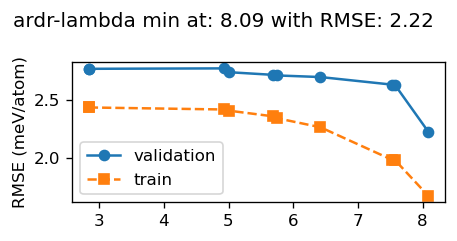

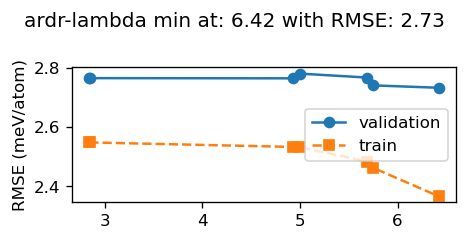

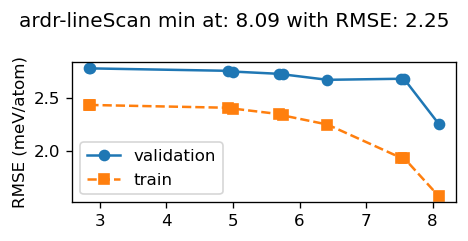

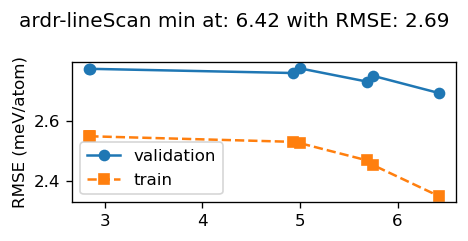

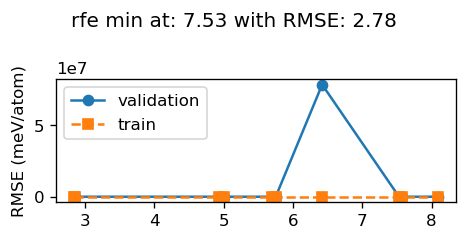

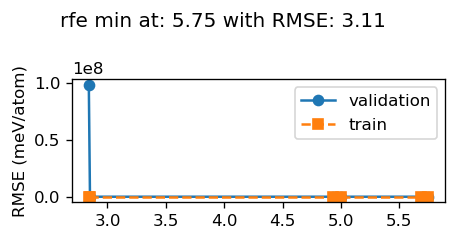

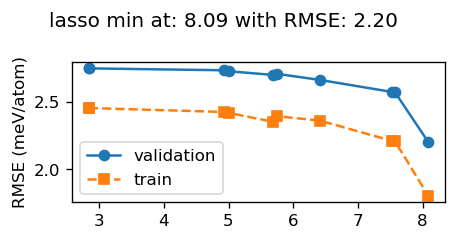

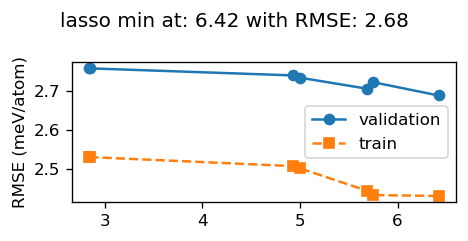

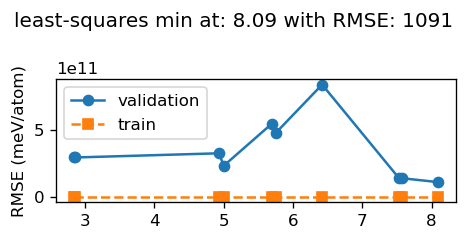

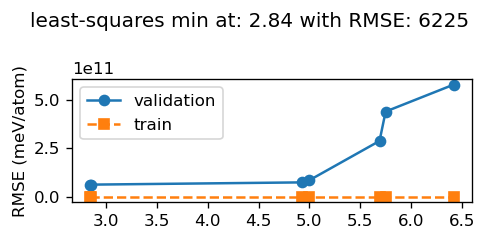

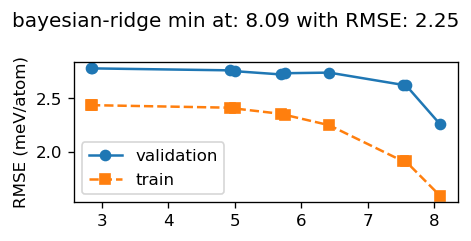

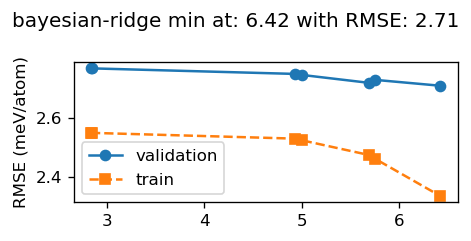

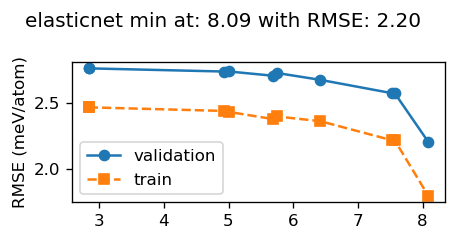

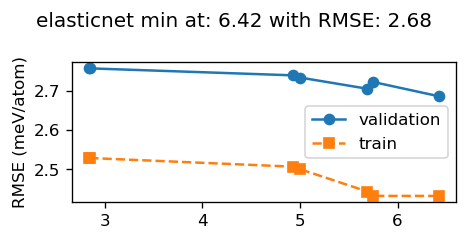

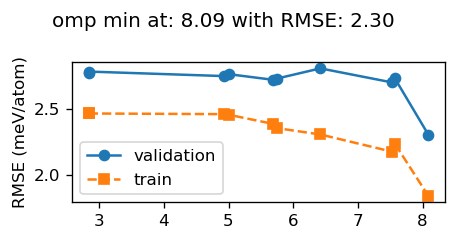

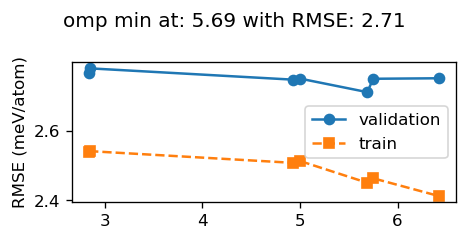

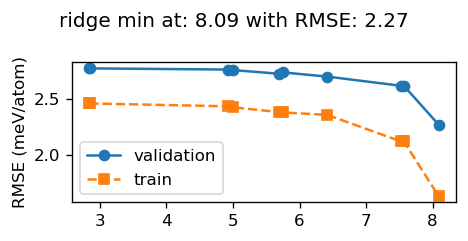

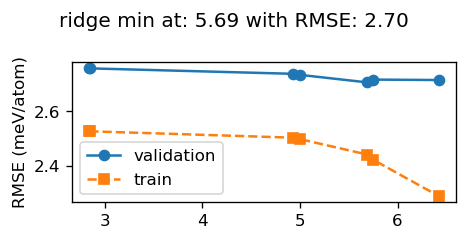

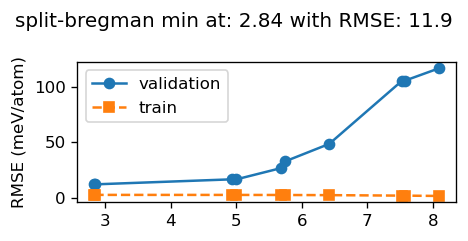

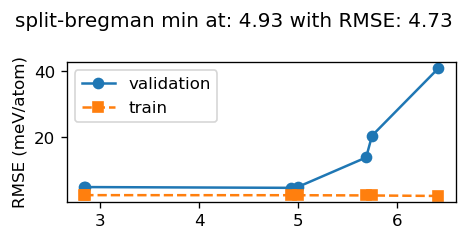

In [ ]:
#with cutoff subgroups
conv = 1000

fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']

for fit_method in fit_methods:
    for cutoff_kind in lower_cutoff_groups:
        df = pd.DataFrame(data[cutoff_kind][fit_method])

        fig, axes = plt.subplots(figsize=(4, 2), dpi=120, sharex=True, nrows=1)

        fig.suptitle('%s with %s as cutoff 3; min at: %s with %s' % (
            fit_method, cutoff_kind, df.cutoff[df.validation.idxmin()], df.validation.min() * conv))

        ax = axes
        ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
        ax.plot(df.cutoff, conv * df.train, '--s', label='train')
        ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
        ax.set_xlabel('cutoff (Å)')
        ax.legend()

        fig.tight_layout()
        fig.subplots_adjust(hspace=0)
        fig.align_ylabels(axes)

        fig.savefig('/nfshome/winkelmann/ARL/save/titanTS_data/cutoff_titanTS_png_plots/plot_cutoff_4_%s_c3-%s.png' %(fit_method, cutoff_kind))

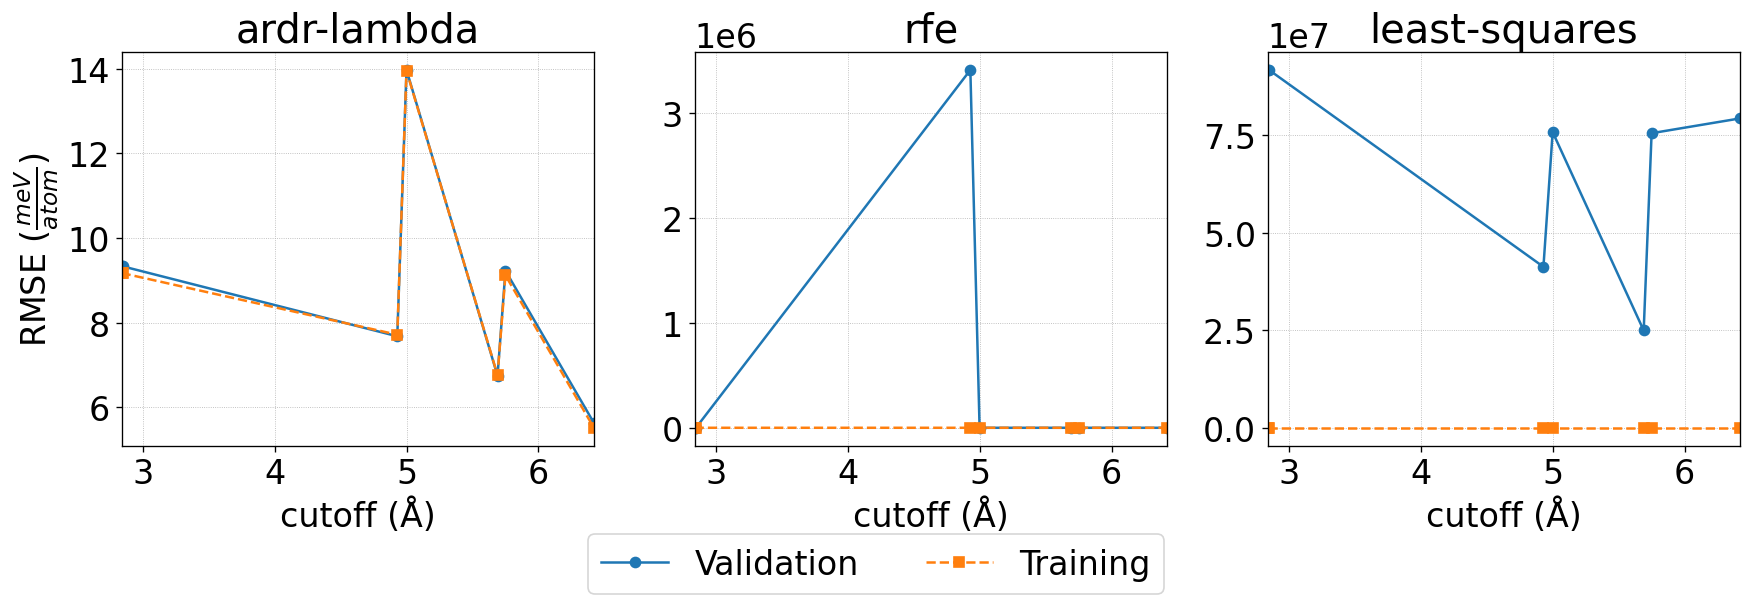

In [85]:
# Create a single figure with shared axes for all fit methods without lines
conv = 1000

# justr the fit methods I want to fit
fit_methods = ['ardr-lambda', 'rfe', 'least-squares']
# not used for fit_method in fit_methods: ['split-bregman', 'ardr-lineScan', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp', 'ridge']

# Calculate number of rows needed (maximum 3 plots per row)
num_methods = len(fit_methods)
num_cols = min(3, num_methods)
num_rows = (num_methods + num_cols - 1) // num_cols  # Ceiling division

#change Font size
plt.rcParams.update({'font.size': 20})

# Create a figure with subplots - organizing methods in rows of 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), dpi=120, 
                         sharex=True, sharey=False)

# Flatten axes array for easier indexing if there are multiple rows
axes_flat = axes.flatten() if num_rows > 1 or num_cols > 1 else [axes]

for i, fit_method in enumerate(fit_methods):
    df = pd.DataFrame(data[fit_method])
    ax = axes_flat[i]
    
    # Plot validation and training data
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
        
    # Set title and labels
    ax.set_title(f'{fit_method}')
        
    # Set x-label for all subplots in the bottom row
    if i >= num_methods - num_cols or num_methods <= num_cols:
        ax.set_xlabel('cutoff (Å)')
    
    # Set x-axis limits but let each subplot have its own y-axis limits
    # You can also manually set y-axis limits if desired:
    # min_y = min(conv * df.validation.min(), conv * df.train.min()) * 0.9
    # max_y = max(conv * df.validation.max(), conv * df.train.max()) * 1.1
    # ax.set_ylim([min_y, max_y])
    
    ax.set_xlim(x_min, x_max)
    ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5)
    
# Hide unused subplots if any
for i in range(num_methods, num_rows * num_cols):
    if i < len(axes_flat):
        axes_flat[i].set_visible(False)

fig.legend(legend_labels[:2], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

axes_flat[0].set_ylabel(r'RMSE ($\frac{meV}{atom}$)')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.92, bottom=0.1)

# Save the figure
fig.savefig(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoff_{model_name}_png_plots/cutoff_methods_comparison.png', 
           dpi=300, bbox_inches='tight')
plt.show()

# Plot for TS cutoff data (ab c3)

In [ ]:
file = open('/nfshome/winkelmann/ARL/tmp/cutoffs_2_jochen_fit', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']
data = {}
    
for fit_method in fit_methods:
    data[fit_method] = {}
    for cutoff_kind in lower_cutoff_groups:
        data[fit_method][cutoff_kind] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 9:
        print(line[8] + ',' + str(line[0:8]))
        continue
    data[line[0]][line[1]]['cutoff'].append(float(line[2]))
    data[line[0]][line[1]]['validation'].append(float(line[3]))
    data[line[0]][line[1]]['train'].append(float(line[4]))
    data[line[0]][line[1]]['BIC'].append(float(line[5]))
    data[line[0]][line[1]]['number'].append(float(line[6]))
    data[line[0]][line[1]]['nonzero'].append(float(line[7]))